# Import libraries

In [1]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# EDA
import klib

# Preprocessing & Feature Engineering
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile

# Data Split & Hyperparameter Optimization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

# Modeling(Regression)
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
# Modeling(Ensemble)
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
# Modeling(Boosting)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, Pool

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline


# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import plotly 
import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import shap
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean

#Deep learning
import tensorflow as tf
from tensorflow import keras
import kerastuner as kt
from pycaret.regression import *
import torch
from torch import nn
from pytorch_tabnet.tab_model  import TabNetRegressor

In [2]:
#시각화 설정
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 15
# 사용자 운영체제 확인
import os
os.name

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

# EDA

In [3]:
DEMO = pd.read_csv('data/LPOINT_BIG_COMP_01_DEMO.csv')
PDDE = pd.read_csv('data/LPOINT_BIG_COMP_02_PDDE.csv')
COP_U = pd.read_csv('data/LPOINT_BIG_COMP_03_COP_U.csv')
PD_CLAC = pd.read_csv('data/LPOINT_BIG_COMP_04_PD_CLAC.csv')
BR = pd.read_csv('data/LPOINT_BIG_COMP_05_BR.csv')
LPAY = pd.read_csv('data/LPOINT_BIG_COMP_06_LPAY.csv')

In [4]:
display(DEMO.head())
display(PDDE.head())
display(COP_U.head())
display(PD_CLAC.head())
display(BR.head())
display(LPAY.head())

,cust,ma_fem_dv,ages,zon_hlv
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17


,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1


,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500


,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구


,br_c,cop_c,zon_hlv,zon_mcls
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005


,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500


In [5]:
display(DEMO.shape)
display(PDDE.shape)
display(COP_U.shape)
display(PD_CLAC.shape)
display(BR.shape)
display(LPAY.shape)

(29913, 4)

(4381743, 10)

(248304, 9)

(1933, 4)

(8808, 4)

(353184, 7)

In [6]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

display(check_missing_col(DEMO))
display(check_missing_col(PDDE))
display(check_missing_col(COP_U))
display(check_missing_col(PD_CLAC))
display(check_missing_col(BR))
display(check_missing_col(LPAY))

결측치가 존재하지 않습니다


[]

결측치가 있는 컬럼은: br_c입니다
해당 컬럼에 총 428501개의 결측치가 존재합니다.


[['br_c', dtype('O')]]

결측치가 있는 컬럼은: br_c입니다
해당 컬럼에 총 55개의 결측치가 존재합니다.


[['br_c', dtype('O')]]

결측치가 존재하지 않습니다


[]

결측치가 존재하지 않습니다


[]

결측치가 존재하지 않습니다


[]

### DEMO(고객 정보 데이터)

In [7]:
DEMO.head()

,cust,ma_fem_dv,ages,zon_hlv
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17


In [8]:
for i in range(4):
    count = DEMO.iloc[:,i].nunique()
    column_name = DEMO.columns[i]
    print(column_name,"의 유니크 값 개수 :",count)
#전체 데이터 = 29913개    
#cust는 모두 다름
#성별은 여성, 남성 두종류임
#나이대는 20대~70대
#지역대분류는 Z01~Z17

cust 의 유니크 값 개수 : 29913
ma_fem_dv 의 유니크 값 개수 : 2
ages 의 유니크 값 개수 : 6
zon_hlv 의 유니크 값 개수 : 17


<AxesSubplot:xlabel='ages', ylabel='count'>

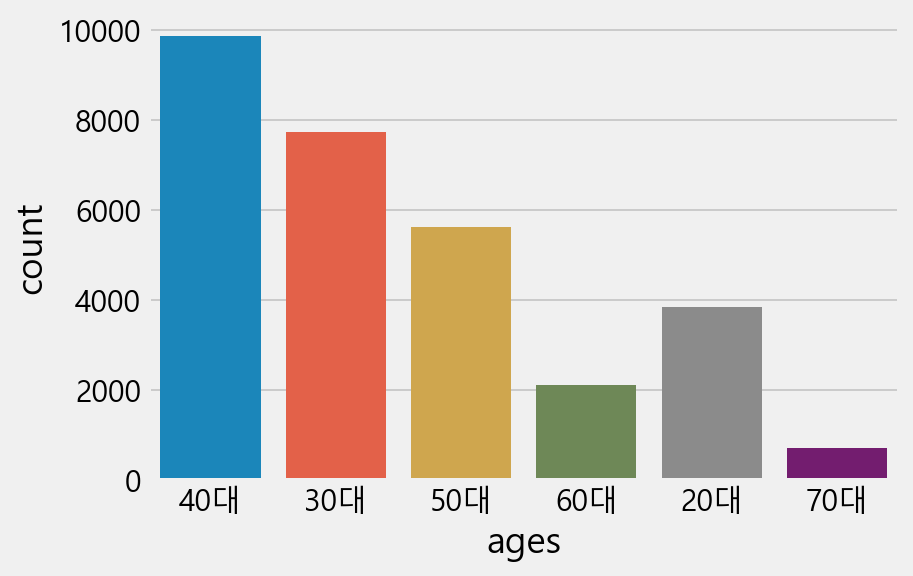

In [9]:
sns.countplot(x='ages',data=DEMO)

<AxesSubplot:xlabel='ma_fem_dv', ylabel='count'>

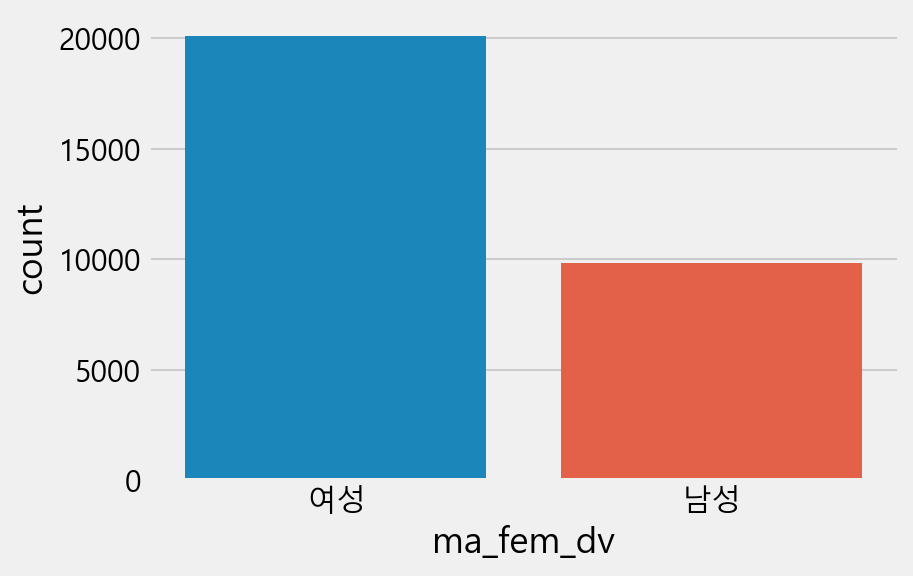

In [10]:
sns.countplot(x='ma_fem_dv',data=DEMO)

<AxesSubplot:xlabel='zon_hlv', ylabel='count'>

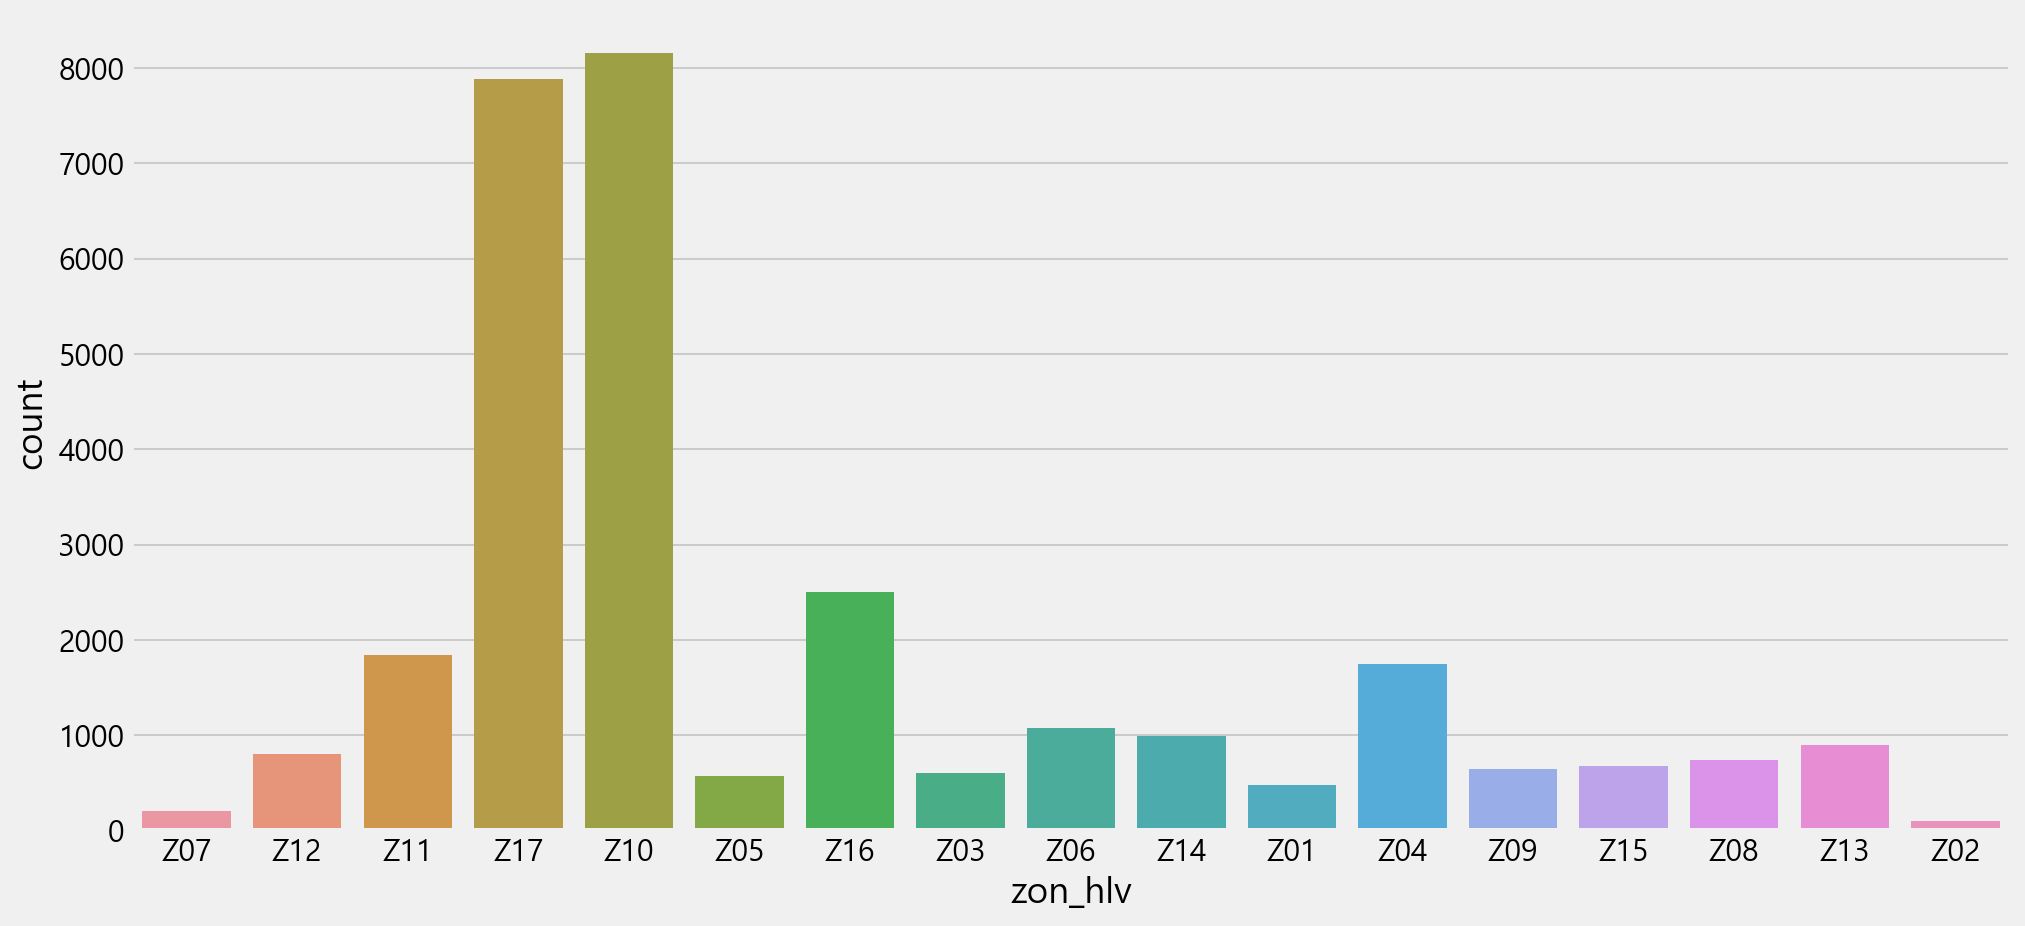

In [11]:
plt.figure(figsize=(15,7))
sns.countplot(x='zon_hlv',data=DEMO)

<AxesSubplot:xlabel='ages', ylabel='count'>

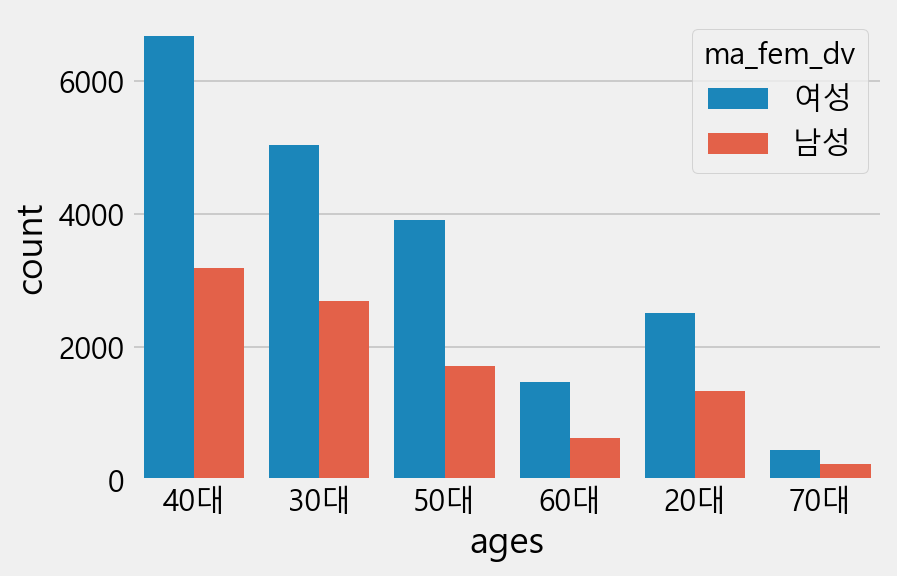

In [12]:
sns.countplot(x='ages',data=DEMO, hue='ma_fem_dv')

<AxesSubplot:xlabel='zon_hlv', ylabel='count'>

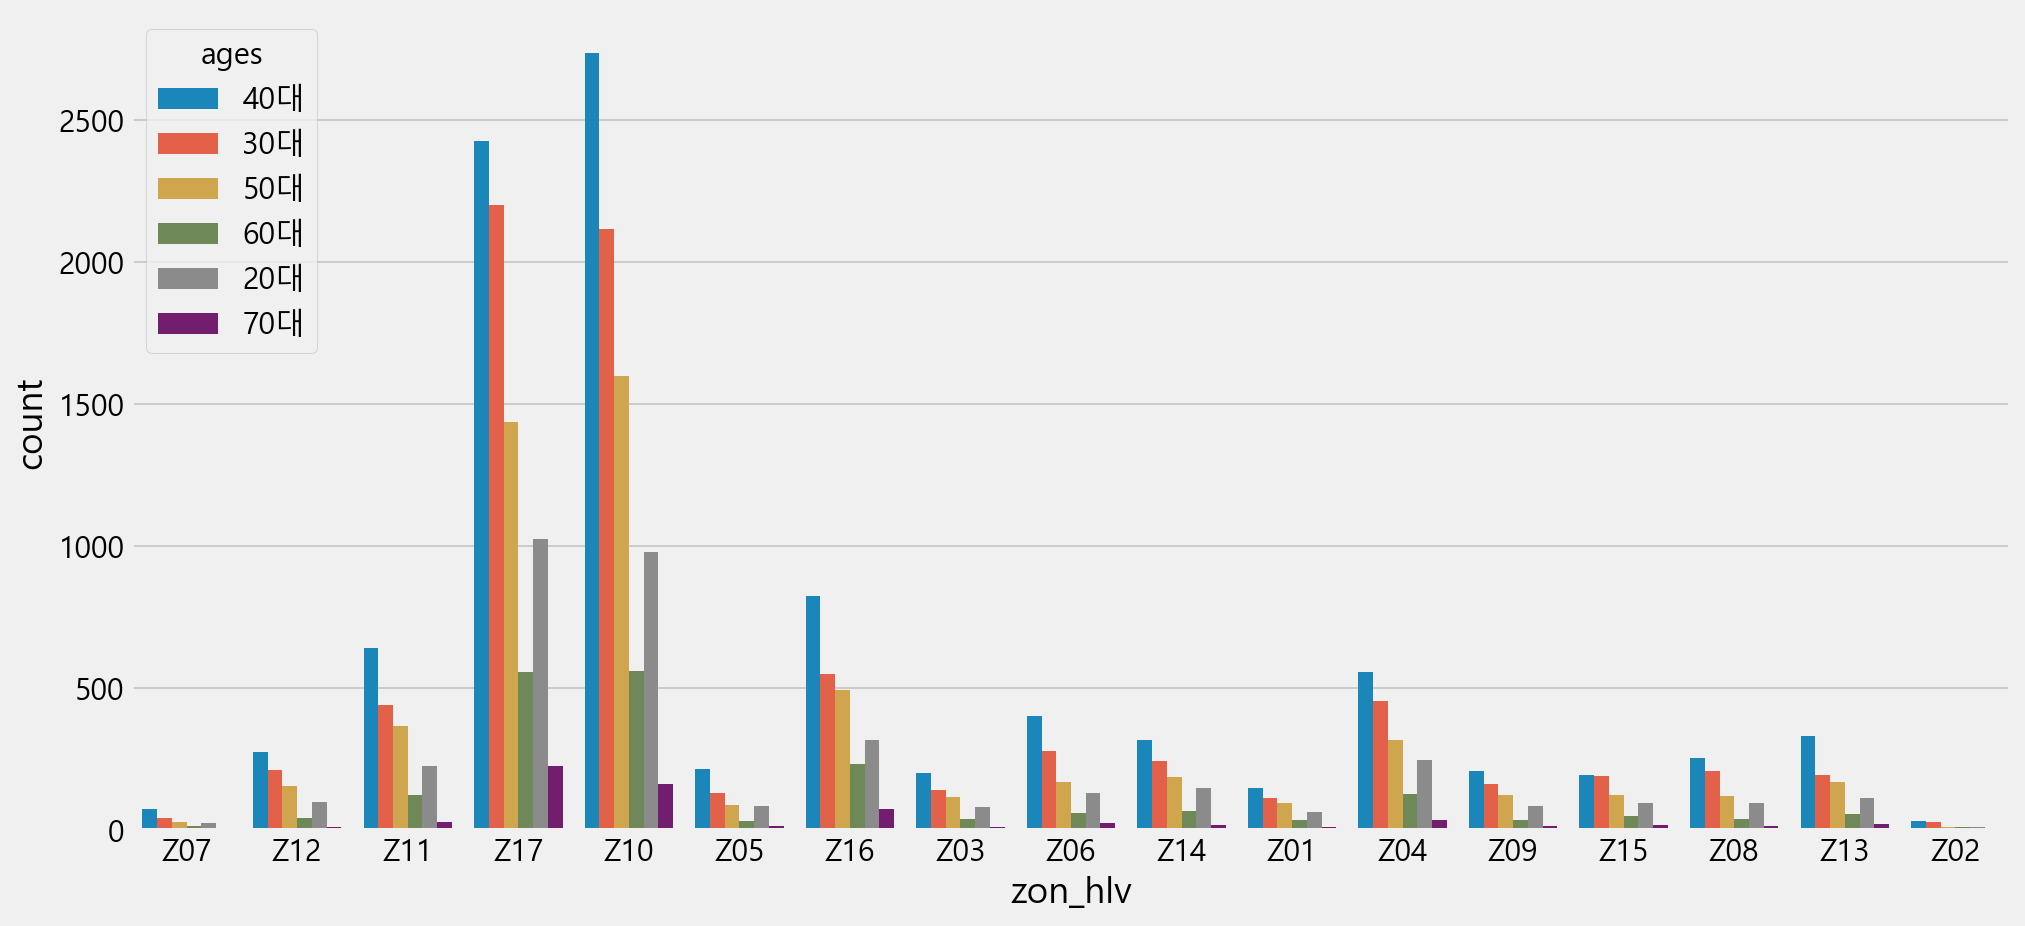

In [13]:
plt.figure(figsize=(15,7))
sns.countplot(x='zon_hlv',data=DEMO, hue='ages')

### PDDE(유통사 상품 구매내역 데이터)

In [14]:
PDDE.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1


In [15]:
PDDE.isna().sum()
#점포코드에 결측값이 존재

cust            0
rct_no          0
chnl_dv         0
cop_c           0
br_c       428501
pd_c            0
de_dt           0
de_hr           0
buy_am          0
buy_ct          0
dtype: int64

In [16]:
PDDE[PDDE['br_c'].notnull()]['chnl_dv'].value_counts()

1    3953242
Name: chnl_dv, dtype: int64

In [17]:
PDDE[PDDE['br_c'].isnull()]['chnl_dv'].value_counts()

2    428501
Name: chnl_dv, dtype: int64

In [18]:
#온라인 구매의 경우 점포코드가 누락되어 있음
#온라인 구매와 오프라인 구매의 비율이 약 1:9임

In [19]:
PDDE = PDDE.fillna('ONLINE')

In [20]:
PDDE.isna().sum()

cust       0
rct_no     0
chnl_dv    0
cop_c      0
br_c       0
pd_c       0
de_dt      0
de_hr      0
buy_am     0
buy_ct     0
dtype: int64

In [21]:
for i in range(8):
    count = PDDE.iloc[:,i].nunique()
    column_name = PDDE.columns[i]
    print(column_name,"의 유니크 값 개수 :",count)
#전체 데이터 = 4381743개
#중복된 cust 아이디가 존재
#중복된 거래내역 코드가 존재
#온/오프라인 
#제휴사 중 유통사 종류는 A01~A06 
#유통사 점포 종류는 6755가지
#상품 코드 종류는 1933가지
#2021년 모든 일자에 대한 구매 데이터
#구매 시간은 01시~24시

cust 의 유니크 값 개수 : 26917
rct_no 의 유니크 값 개수 : 1266589
chnl_dv 의 유니크 값 개수 : 2
cop_c 의 유니크 값 개수 : 6
br_c 의 유니크 값 개수 : 6756
pd_c 의 유니크 값 개수 : 1933
de_dt 의 유니크 값 개수 : 365
de_hr 의 유니크 값 개수 : 24


In [22]:
PDDE['tot_am'] = PDDE['buy_am'] * PDDE['buy_ct']

<AxesSubplot:xlabel='chnl_dv', ylabel='tot_am'>

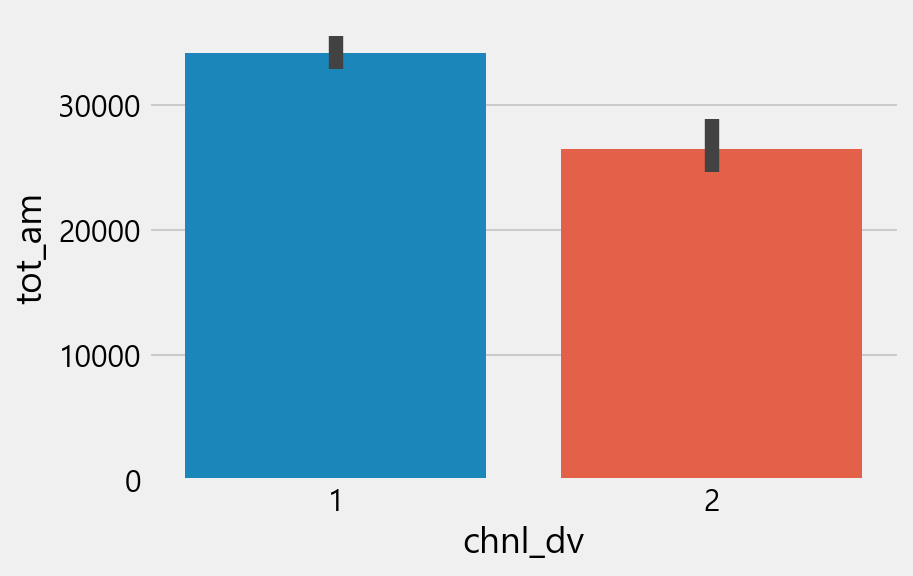

In [24]:
sns.barplot(data=PDDE, x='chnl_dv',y='tot_am')

In [23]:
PDDE.groupby('chnl_dv')['tot_am'].sum()
#온오프라인의 구매비율과 총구매액의 비율이 비슷함
#온라인 구매액이 살짝 저조한 경향이 있음
#오프라인 구매액보다 온라인 구매액의 편차가 더 큼

chnl_dv
1    1.348292e+11
2    1.135370e+10
Name: tot_am, dtype: float64

In [24]:
from datetime import datetime

def what_day_is_it(date):
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    day = date.weekday()
    return days[day]

PDDE['de_year'] = PDDE['de_dt'].apply(lambda x : str(x)[:4])
PDDE['de_month'] = PDDE['de_dt'].apply(lambda x : str(x)[4:6])
PDDE['de_day'] = PDDE['de_dt'].apply(lambda x : str(x)[6:])
PDDE['de_week'] = PDDE['de_dt'].apply(lambda x : datetime.strptime(str(x), '%Y%m%d')).apply(what_day_is_it)
PDDE.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,tot_am,de_year,de_month,de_day,de_week
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,15000.0,2021,01,01,Fri
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,79700.0,2021,01,01,Fri
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,19000.0,2021,01,01,Fri
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,19000.0,2021,01,01,Fri
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,19000.0,2021,01,01,Fri


In [25]:
PDDE.drop_duplicates(inplace=True, ignore_index=True)
PDDE

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,tot_am,de_year,de_month,de_day,de_week
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,15000.0,2021,01,01,Fri
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,79700.0,2021,01,01,Fri
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,19000.0,2021,01,01,Fri
3,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,19000.0,2021,01,01,Fri
4,M430112881,A01000005297,1,A01,A010039,PD1692,20210101,10,9900.0,1,9900.0,2021,01,01,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144384,M816318679,E06052115831,2,A06,ONLINE,PD0507,20211231,22,50000.0,1,50000.0,2021,12,31,Fri
4144385,M816318679,E06052116037,2,A06,ONLINE,PD0507,20211231,22,10000.0,1,10000.0,2021,12,31,Fri
4144386,M182645944,E06052117103,2,A06,ONLINE,PD0294,20211231,23,289000.0,1,289000.0,2021,12,31,Fri
4144387,M533286446,E06052118403,2,A06,ONLINE,PD0507,20211231,23,200000.0,1,200000.0,2021,12,31,Fri


In [26]:
PDDE.describe()

,chnl_dv,de_dt,de_hr,buy_am,buy_ct,tot_am
count,4.144389e+06,4.144389e+06,4.144389e+06,4.144389e+06,4.144389e+06,4.144389e+06
mean,1.090673e+00,2.021064e+07,1.572187e+01,2.400749e+04,1.319961e+00,3.461381e+04
std,2.871435e-01,3.411636e+02,3.693825e+00,2.357941e+05,1.629315e+00,1.348600e+06
min,1.000000e+00,2.021010e+07,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,2.021032e+07,1.300000e+01,2.090000e+03,1.000000e+00,2.400000e+03
50%,1.000000e+00,2.021062e+07,1.600000e+01,4.080000e+03,1.000000e+00,4.700000e+03
75%,1.000000e+00,2.021092e+07,1.800000e+01,9.600000e+03,1.000000e+00,1.090000e+04
max,2.000000e+00,2.021123e+07,2.300000e+01,6.400000e+07,1.000000e+02,1.163650e+09


In [27]:
from collections import Counter

def func(x):
    y = Counter(x)
    return y.most_common()[0]

In [28]:
chnl = PDDE.groupby('cust')['chnl_dv'].agg([('main_chnl',func)]).reset_index()
chnl['chnl_tot'] = np.array(PDDE.groupby(['cust','chnl_dv'])['tot_am'].sum().groupby('cust').max())
chnl = chnl.fillna(0)
chnl

,cust,main_chnl,chnl_tot
0,M000034966,"(1, 48)",741520.0
1,M000136117,"(1, 90)",27084330.0
2,M000201112,"(1, 20)",92529.0
3,M000225114,"(1, 153)",1877490.0
4,M000261625,"(1, 66)",6492800.0
...,...,...,...
26912,M999599111,"(1, 32)",1180900.0
26913,M999673157,"(1, 24)",2869290.0
26914,M999770689,"(1, 291)",1371740.0
26915,M999849895,"(1, 69)",2550312.0


In [29]:
cop_c = PDDE.groupby('cust')['cop_c'].agg([('main_cop',func)]).reset_index()
cop_c['cop_tot'] = np.array(PDDE.groupby(['cust','cop_c'])['tot_am'].sum().groupby('cust').max())
cop_c = cop_c.fillna(0)
cop_c

,cust,main_cop,cop_tot
0,M000034966,"(A02, 41)",555520.0
1,M000136117,"(A01, 83)",27038860.0
2,M000201112,"(A04, 20)",92529.0
3,M000225114,"(A01, 150)",1862750.0
4,M000261625,"(A01, 66)",6492800.0
...,...,...,...
26912,M999599111,"(A02, 28)",1158000.0
26913,M999673157,"(A01, 12)",2722400.0
26914,M999770689,"(A04, 144)",738860.0
26915,M999849895,"(A02, 40)",1801862.0


In [30]:
br_c = PDDE.groupby('cust')['br_c'].agg([('main_br_c',func)]).reset_index()
br_c['br_c_tot'] = np.array(PDDE.groupby(['cust','br_c'])['tot_am'].sum().groupby('cust').max())
br_c = br_c.fillna(0)
br_c

,cust,main_br_c,br_c_tot
0,M000034966,"(A020116, 41)",555520.0
1,M000136117,"(A010018, 70)",26425660.0
2,M000201112,"(A043753, 9)",67009.0
3,M000225114,"(A010011, 144)",1609250.0
4,M000261625,"(A010017, 53)",5430600.0
...,...,...,...
26912,M999599111,"(A020059, 28)",1180900.0
26913,M999673157,"(A010034, 10)",1673000.0
26914,M999770689,"(A020081, 106)",618410.0
26915,M999849895,"(A020058, 30)",1496100.0


In [31]:
pd_c = PDDE.groupby('cust')['pd_c'].agg([('main_pd',func)]).reset_index()
pd_c['pd_tot'] = np.array(PDDE.groupby(['cust','pd_c'])['tot_am'].sum().groupby('cust').max())
pd_c = pd_c.fillna(0)
pd_c

,cust,main_pd,pd_tot
0,M000034966,"(PD0952, 3)",148300.0
1,M000136117,"(PD0977, 10)",9999000.0
2,M000201112,"(PD1243, 2)",32000.0
3,M000225114,"(PD0232, 18)",223000.0
4,M000261625,"(PD1689, 8)",1160000.0
...,...,...,...
26912,M999599111,"(PD0411, 3)",1158000.0
26913,M999673157,"(PD0381, 6)",1673000.0
26914,M999770689,"(PD0240, 28)",235680.0
26915,M999849895,"(PD0288, 14)",1469000.0


In [32]:
de_hr = PDDE.groupby('cust')['de_hr'].agg([('main_de_hr',func)]).reset_index()
de_hr['de_hr_tot'] = np.array(PDDE.groupby(['cust','de_hr'])['tot_am'].sum().groupby('cust').max())
de_hr = de_hr.fillna(0)
de_hr

,cust,main_de_hr,de_hr_tot
0,M000034966,"(16, 25)",253880.0
1,M000136117,"(16, 25)",7965450.0
2,M000201112,"(15, 9)",67009.0
3,M000225114,"(18, 69)",847510.0
4,M000261625,"(18, 15)",2020900.0
...,...,...,...
26912,M999599111,"(19, 28)",1158000.0
26913,M999673157,"(12, 4)",1673000.0
26914,M999770689,"(21, 57)",393640.0
26915,M999849895,"(19, 16)",1580400.0


In [33]:
de_month = PDDE.groupby('cust')['de_month'].agg([('main_de_month',func)]).reset_index()
de_month['de_month_tot'] = np.array(PDDE.groupby(['cust','de_month'])['tot_am'].sum().groupby('cust').max())
de_month = de_month.fillna(0)
de_month

,cust,main_de_month,de_month_tot
0,M000034966,"(09, 25)",253880.0
1,M000136117,"(01, 27)",10680370.0
2,M000201112,"(07, 9)",67009.0
3,M000225114,"(04, 47)",561310.0
4,M000261625,"(07, 17)",2302200.0
...,...,...,...
26912,M999599111,"(04, 17)",1158000.0
26913,M999673157,"(12, 11)",1789000.0
26914,M999770689,"(02, 67)",425770.0
26915,M999849895,"(09, 20)",1574420.0


In [34]:
de_day = PDDE.groupby('cust')['de_day'].agg([('main_de_day',func)]).reset_index()
de_day['de_day_tot'] = np.array(PDDE.groupby(['cust','de_day'])['tot_am'].sum().groupby('cust').max())
de_day = de_day.fillna(0)
de_day

,cust,main_de_day,de_day_tot
0,M000034966,"(19, 25)",253880.0
1,M000136117,"(04, 17)",5707800.0
2,M000201112,"(25, 9)",67009.0
3,M000225114,"(16, 19)",297100.0
4,M000261625,"(13, 16)",1274200.0
...,...,...,...
26912,M999599111,"(14, 19)",1158000.0
26913,M999673157,"(16, 6)",1673000.0
26914,M999770689,"(13, 31)",219250.0
26915,M999849895,"(04, 18)",1561900.0


In [35]:
de_week= PDDE.groupby('cust')['de_week'].agg([('main_de_week',func)]).reset_index()
de_week['de_week_tot'] = np.array(PDDE.groupby(['cust','de_week'])['tot_am'].sum().groupby('cust').max())
de_week = de_week.fillna(0)
de_week

,cust,main_de_week,de_week_tot
0,M000034966,"(Sun, 29)",351800.0
1,M000136117,"(Thu, 27)",12896000.0
2,M000201112,"(Sun, 11)",72309.0
3,M000225114,"(Tue, 59)",645510.0
4,M000261625,"(Sat, 25)",2183200.0
...,...,...,...
26912,M999599111,"(Wed, 29)",1475882.0
26913,M999673157,"(Thu, 9)",1760400.0
26914,M999770689,"(Thu, 65)",297520.0
26915,M999849895,"(Wed, 22)",1604400.0


In [36]:
PDDE.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,tot_am,de_year,de_month,de_day,de_week
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,15000.0,2021,01,01,Fri
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,79700.0,2021,01,01,Fri
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,19000.0,2021,01,01,Fri
3,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,19000.0,2021,01,01,Fri
4,M430112881,A01000005297,1,A01,A010039,PD1692,20210101,10,9900.0,1,9900.0,2021,01,01,Fri


In [37]:
agg_dict = {
    # 기존 컬럼
    'cust':['count'],
    'rct_no':['nunique'],
    'chnl_dv':['nunique'],
    'cop_c':['nunique'],
    'br_c':['nunique'],
    'pd_c':['nunique'],
    'de_dt':['nunique'],
    'de_hr':['nunique'],
    'buy_ct':['mean','min','max'],
    'tot_am':['mean','min','max'],
    'de_month':['nunique'],
    'de_day':['nunique'],
    'de_week':['nunique']
}

In [38]:
PDDE_New = PDDE.groupby('cust').agg(agg_dict)
PDDE_New = PDDE_New.fillna(0)
PDDE_New.columns = [('_').join(column).upper() for column in PDDE_New.columns.ravel()]
PDDE_New = PDDE_New.reset_index()
PDDE_New

,cust,CUST_COUNT,RCT_NO_NUNIQUE,CHNL_DV_NUNIQUE,COP_C_NUNIQUE,BR_C_NUNIQUE,PD_C_NUNIQUE,DE_DT_NUNIQUE,DE_HR_NUNIQUE,BUY_CT_MEAN,BUY_CT_MIN,BUY_CT_MAX,TOT_AM_MEAN,TOT_AM_MIN,TOT_AM_MAX,DE_MONTH_NUNIQUE,DE_DAY_NUNIQUE,DE_WEEK_NUNIQUE
0,M000034966,48,12,1,3,4,37,7,6,1.250000,1,4,15448.333333,100.0,65700.0,6,6,4
1,M000136117,102,70,2,3,4,59,29,10,1.049020,1,5,268638.529412,100.0,2612000.0,9,19,7
2,M000201112,20,5,1,1,3,19,4,5,1.450000,1,4,4626.450000,20.0,32000.0,3,4,2
3,M000225114,153,78,1,2,4,61,38,10,1.143791,1,4,12271.176471,300.0,129000.0,10,25,7
4,M000261625,66,48,1,1,4,33,22,10,1.060606,1,3,98375.757576,2600.0,1160000.0,12,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26912,M999599111,34,8,2,4,4,23,7,6,1.264706,1,3,45590.647059,980.0,1158000.0,6,6,3
26913,M999673157,24,17,1,2,9,13,13,9,1.166667,1,2,119553.750000,50.0,1673000.0,4,10,6
26914,M999770689,308,122,2,4,15,96,93,19,1.227273,1,5,4955.974026,50.0,99500.0,12,30,7
26915,M999849895,69,34,1,3,8,48,19,11,1.681159,1,38,36961.043478,840.0,1444000.0,10,14,5


In [39]:
PDDE_New = pd.merge(PDDE_New, chnl, how='inner', on=None)
PDDE_New = pd.merge(PDDE_New, cop_c, how='inner', on=None)
PDDE_New = pd.merge(PDDE_New, br_c, how='inner', on=None)
PDDE_New = pd.merge(PDDE_New, pd_c, how='inner', on=None)
PDDE_New = pd.merge(PDDE_New, de_hr, how='inner', on=None)
PDDE_New = pd.merge(PDDE_New, de_month, how='inner', on=None)
PDDE_New = pd.merge(PDDE_New, de_day, how='inner', on=None)
PDDE_New = pd.merge(PDDE_New, de_week, how='inner', on=None)
PDDE_New

,cust,CUST_COUNT,RCT_NO_NUNIQUE,CHNL_DV_NUNIQUE,COP_C_NUNIQUE,BR_C_NUNIQUE,PD_C_NUNIQUE,DE_DT_NUNIQUE,DE_HR_NUNIQUE,BUY_CT_MEAN,BUY_CT_MIN,BUY_CT_MAX,TOT_AM_MEAN,TOT_AM_MIN,TOT_AM_MAX,DE_MONTH_NUNIQUE,DE_DAY_NUNIQUE,DE_WEEK_NUNIQUE,main_chnl,chnl_tot,main_cop,cop_tot,main_br_c,br_c_tot,main_pd,pd_tot,main_de_hr,de_hr_tot,main_de_month,de_month_tot,main_de_day,de_day_tot,main_de_week,de_week_tot
0,M000034966,48,12,1,3,4,37,7,6,1.250000,1,4,15448.333333,100.0,65700.0,6,6,4,"(1, 48)",741520.0,"(A02, 41)",555520.0,"(A020116, 41)",555520.0,"(PD0952, 3)",148300.0,"(16, 25)",253880.0,"(09, 25)",253880.0,"(19, 25)",253880.0,"(Sun, 29)",351800.0
1,M000136117,102,70,2,3,4,59,29,10,1.049020,1,5,268638.529412,100.0,2612000.0,9,19,7,"(1, 90)",27084330.0,"(A01, 83)",27038860.0,"(A010018, 70)",26425660.0,"(PD0977, 10)",9999000.0,"(16, 25)",7965450.0,"(01, 27)",10680370.0,"(04, 17)",5707800.0,"(Thu, 27)",12896000.0
2,M000201112,20,5,1,1,3,19,4,5,1.450000,1,4,4626.450000,20.0,32000.0,3,4,2,"(1, 20)",92529.0,"(A04, 20)",92529.0,"(A043753, 9)",67009.0,"(PD1243, 2)",32000.0,"(15, 9)",67009.0,"(07, 9)",67009.0,"(25, 9)",67009.0,"(Sun, 11)",72309.0
3,M000225114,153,78,1,2,4,61,38,10,1.143791,1,4,12271.176471,300.0,129000.0,10,25,7,"(1, 153)",1877490.0,"(A01, 150)",1862750.0,"(A010011, 144)",1609250.0,"(PD0232, 18)",223000.0,"(18, 69)",847510.0,"(04, 47)",561310.0,"(16, 19)",297100.0,"(Tue, 59)",645510.0
4,M000261625,66,48,1,1,4,33,22,10,1.060606,1,3,98375.757576,2600.0,1160000.0,12,13,5,"(1, 66)",6492800.0,"(A01, 66)",6492800.0,"(A010017, 53)",5430600.0,"(PD1689, 8)",1160000.0,"(18, 15)",2020900.0,"(07, 17)",2302200.0,"(13, 16)",1274200.0,"(Sat, 25)",2183200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26912,M999599111,34,8,2,4,4,23,7,6,1.264706,1,3,45590.647059,980.0,1158000.0,6,6,3,"(1, 32)",1180900.0,"(A02, 28)",1158000.0,"(A020059, 28)",1180900.0,"(PD0411, 3)",1158000.0,"(19, 28)",1158000.0,"(04, 17)",1158000.0,"(14, 19)",1158000.0,"(Wed, 29)",1475882.0
26913,M999673157,24,17,1,2,9,13,13,9,1.166667,1,2,119553.750000,50.0,1673000.0,4,10,6,"(1, 24)",2869290.0,"(A01, 12)",2722400.0,"(A010034, 10)",1673000.0,"(PD0381, 6)",1673000.0,"(12, 4)",1673000.0,"(12, 11)",1789000.0,"(16, 6)",1673000.0,"(Thu, 9)",1760400.0
26914,M999770689,308,122,2,4,15,96,93,19,1.227273,1,5,4955.974026,50.0,99500.0,12,30,7,"(1, 291)",1371740.0,"(A04, 144)",738860.0,"(A020081, 106)",618410.0,"(PD0240, 28)",235680.0,"(21, 57)",393640.0,"(02, 67)",425770.0,"(13, 31)",219250.0,"(Thu, 65)",297520.0
26915,M999849895,69,34,1,3,8,48,19,11,1.681159,1,38,36961.043478,840.0,1444000.0,10,14,5,"(1, 69)",2550312.0,"(A02, 40)",1801862.0,"(A020058, 30)",1496100.0,"(PD0288, 14)",1469000.0,"(19, 16)",1580400.0,"(09, 20)",1574420.0,"(04, 18)",1561900.0,"(Wed, 22)",1604400.0


In [40]:
PDDE_New.columns

Index(['cust', 'CUST_COUNT', 'RCT_NO_NUNIQUE', 'CHNL_DV_NUNIQUE',
       'COP_C_NUNIQUE', 'BR_C_NUNIQUE', 'PD_C_NUNIQUE', 'DE_DT_NUNIQUE',
       'DE_HR_NUNIQUE', 'BUY_CT_MEAN', 'BUY_CT_MIN', 'BUY_CT_MAX',
       'TOT_AM_MEAN', 'TOT_AM_MIN', 'TOT_AM_MAX', 'DE_MONTH_NUNIQUE',
       'DE_DAY_NUNIQUE', 'DE_WEEK_NUNIQUE', 'main_chnl', 'chnl_tot',
       'main_cop', 'cop_tot', 'main_br_c', 'br_c_tot', 'main_pd', 'pd_tot',
       'main_de_hr', 'de_hr_tot', 'main_de_month', 'de_month_tot',
       'main_de_day', 'de_day_tot', 'main_de_week', 'de_week_tot'],
      dtype='object')

In [41]:
columns_name = ['cust','거래횟수','거래내역수','거래방법수','방문유통사수','방문유통사지점수','구매상품종류수','구매일자수','구매시간수','구매수평균','구매수최소','구매수최대','총구매액평균','총구매액최소','총구매액최대','구매월수','구매일수','구매요일수','주구매수단/횟수','주구매수단액수','주구매유통사/횟수','주구매유통사액수','주구매유통사지점/횟수','주구매유통사지점액수','주구매상품/횟수','주구매상품액수','주구매시간/횟수','주구매시간액수','주구매월/횟수','주구매월액수','주구매일/횟수','주구매일액수','주구매요일/횟수','주구매요일액수']
PDDE_New.columns = columns_name
PDDE_New

,cust,거래횟수,거래내역수,거래방법수,방문유통사수,방문유통사지점수,구매상품종류수,구매일자수,구매시간수,구매수평균,구매수최소,구매수최대,총구매액평균,총구매액최소,총구매액최대,구매월수,구매일수,구매요일수,주구매수단/횟수,주구매수단액수,주구매유통사/횟수,주구매유통사액수,주구매유통사지점/횟수,주구매유통사지점액수,주구매상품/횟수,주구매상품액수,주구매시간/횟수,주구매시간액수,주구매월/횟수,주구매월액수,주구매일/횟수,주구매일액수,주구매요일/횟수,주구매요일액수
0,M000034966,48,12,1,3,4,37,7,6,1.250000,1,4,15448.333333,100.0,65700.0,6,6,4,"(1, 48)",741520.0,"(A02, 41)",555520.0,"(A020116, 41)",555520.0,"(PD0952, 3)",148300.0,"(16, 25)",253880.0,"(09, 25)",253880.0,"(19, 25)",253880.0,"(Sun, 29)",351800.0
1,M000136117,102,70,2,3,4,59,29,10,1.049020,1,5,268638.529412,100.0,2612000.0,9,19,7,"(1, 90)",27084330.0,"(A01, 83)",27038860.0,"(A010018, 70)",26425660.0,"(PD0977, 10)",9999000.0,"(16, 25)",7965450.0,"(01, 27)",10680370.0,"(04, 17)",5707800.0,"(Thu, 27)",12896000.0
2,M000201112,20,5,1,1,3,19,4,5,1.450000,1,4,4626.450000,20.0,32000.0,3,4,2,"(1, 20)",92529.0,"(A04, 20)",92529.0,"(A043753, 9)",67009.0,"(PD1243, 2)",32000.0,"(15, 9)",67009.0,"(07, 9)",67009.0,"(25, 9)",67009.0,"(Sun, 11)",72309.0
3,M000225114,153,78,1,2,4,61,38,10,1.143791,1,4,12271.176471,300.0,129000.0,10,25,7,"(1, 153)",1877490.0,"(A01, 150)",1862750.0,"(A010011, 144)",1609250.0,"(PD0232, 18)",223000.0,"(18, 69)",847510.0,"(04, 47)",561310.0,"(16, 19)",297100.0,"(Tue, 59)",645510.0
4,M000261625,66,48,1,1,4,33,22,10,1.060606,1,3,98375.757576,2600.0,1160000.0,12,13,5,"(1, 66)",6492800.0,"(A01, 66)",6492800.0,"(A010017, 53)",5430600.0,"(PD1689, 8)",1160000.0,"(18, 15)",2020900.0,"(07, 17)",2302200.0,"(13, 16)",1274200.0,"(Sat, 25)",2183200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26912,M999599111,34,8,2,4,4,23,7,6,1.264706,1,3,45590.647059,980.0,1158000.0,6,6,3,"(1, 32)",1180900.0,"(A02, 28)",1158000.0,"(A020059, 28)",1180900.0,"(PD0411, 3)",1158000.0,"(19, 28)",1158000.0,"(04, 17)",1158000.0,"(14, 19)",1158000.0,"(Wed, 29)",1475882.0
26913,M999673157,24,17,1,2,9,13,13,9,1.166667,1,2,119553.750000,50.0,1673000.0,4,10,6,"(1, 24)",2869290.0,"(A01, 12)",2722400.0,"(A010034, 10)",1673000.0,"(PD0381, 6)",1673000.0,"(12, 4)",1673000.0,"(12, 11)",1789000.0,"(16, 6)",1673000.0,"(Thu, 9)",1760400.0
26914,M999770689,308,122,2,4,15,96,93,19,1.227273,1,5,4955.974026,50.0,99500.0,12,30,7,"(1, 291)",1371740.0,"(A04, 144)",738860.0,"(A020081, 106)",618410.0,"(PD0240, 28)",235680.0,"(21, 57)",393640.0,"(02, 67)",425770.0,"(13, 31)",219250.0,"(Thu, 65)",297520.0
26915,M999849895,69,34,1,3,8,48,19,11,1.681159,1,38,36961.043478,840.0,1444000.0,10,14,5,"(1, 69)",2550312.0,"(A02, 40)",1801862.0,"(A020058, 30)",1496100.0,"(PD0288, 14)",1469000.0,"(19, 16)",1580400.0,"(09, 20)",1574420.0,"(04, 18)",1561900.0,"(Wed, 22)",1604400.0


### COP_U(제휴사 이용정보 데이터)

In [42]:
for i in range(8):
    count = COP_U.iloc[:,i].nunique()
    column_name = COP_U.columns[i]
    print(column_name,"의 유니크 값 개수 :",count)
#전체 데이터 = 248304개
#중복된 cust 아이디가 존재
#거래내역 코드가 모두 다름
#온/오프라인 
#제휴사 종류는 B01~E01 6가지 
#제휴사 점포 종류는 2029가지
#2021년 모든 일자 + 2020년 일자에 대한 구매 데이터 369가지
#구매 시간은 01시~24시

cust 의 유니크 값 개수 : 21769
rct_no 의 유니크 값 개수 : 248304
cop_c 의 유니크 값 개수 : 6
br_c 의 유니크 값 개수 : 2029
chnl_dv 의 유니크 값 개수 : 2
de_dt 의 유니크 값 개수 : 369
vst_dt 의 유니크 값 개수 : 366
de_hr 의 유니크 값 개수 : 24


In [43]:
COP_U.head()

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500


In [44]:
COP_U.isna().sum()
#점포코드에 결측값 존재

cust        0
rct_no      0
cop_c       0
br_c       55
chnl_dv     0
de_dt       0
vst_dt      0
de_hr       0
buy_am      0
dtype: int64

In [45]:
COP_U[COP_U['br_c'].notnull()]['chnl_dv'].value_counts()
#온라인 구매인데 점포코드가 있다 = 오프라인에서 온라인으로 구매함

1    213525
2     34724
Name: chnl_dv, dtype: int64

In [46]:
COP_U[COP_U['br_c'].isnull()]['chnl_dv'].value_counts()

2    55
Name: chnl_dv, dtype: int64

In [47]:
COP_U = COP_U.fillna('ONLINE')

In [48]:
COP_U.isna().sum()

cust       0
rct_no     0
cop_c      0
br_c       0
chnl_dv    0
de_dt      0
vst_dt     0
de_hr      0
buy_am     0
dtype: int64

In [49]:
COP_U['거래/방문일치여부'] = COP_U['de_dt'] == COP_U['vst_dt']
COP_U['거래/방문일치여부'] = COP_U['거래/방문일치여부'].astype(int)
COP_U

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,거래/방문일치여부
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000,1
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100,1
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500,1
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200,1
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500,1
...,...,...,...,...,...,...,...,...,...,...
248299,M058650684,21111614C021426818,C02,C020002,1,20211116,20211116,14,2000,1
248300,M058650684,21111619C023223432,C02,C020002,1,20211116,20211116,19,26900,1
248301,M014154595,21121209C015324520,C01,C010087,2,20211212,20211212,9,2000,1
248302,M510878172,21112719C013369102,C01,C010007,2,20211127,20211127,19,6000,1


In [50]:
COP_U['de_year'] = COP_U['de_dt'].apply(lambda x : str(x)[:4])
COP_U['de_month'] = COP_U['de_dt'].apply(lambda x : str(x)[4:6])
COP_U['de_day'] = COP_U['de_dt'].apply(lambda x : str(x)[6:])
COP_U['de_week'] = COP_U['de_dt'].apply(lambda x : datetime.strptime(str(x), '%Y%m%d')).apply(what_day_is_it)

COP_U['vst_year'] = COP_U['vst_dt'].apply(lambda x : str(x)[:4])
COP_U['vst_month'] = COP_U['vst_dt'].apply(lambda x : str(x)[4:6])
COP_U['vst_day'] = COP_U['vst_dt'].apply(lambda x : str(x)[6:])
COP_U['vst_week'] = COP_U['vst_dt'].apply(lambda x : datetime.strptime(str(x), '%Y%m%d')).apply(what_day_is_it)
COP_U.head()

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,거래/방문일치여부,de_year,de_month,de_day,de_week,vst_year,vst_month,vst_day,vst_week
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000,1,2021,10,26,Tue,2021,10,26,Tue
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100,1,2021,11,06,Sat,2021,11,06,Sat
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500,1,2021,02,11,Thu,2021,02,11,Thu
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200,1,2021,09,20,Mon,2021,09,20,Mon
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500,1,2021,10,10,Sun,2021,10,10,Sun


In [51]:
COP_U.drop_duplicates(inplace=True, ignore_index=True)
COP_U
#중복데이터 없음

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,거래/방문일치여부,de_year,de_month,de_day,de_week,vst_year,vst_month,vst_day,vst_week
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000,1,2021,10,26,Tue,2021,10,26,Tue
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100,1,2021,11,06,Sat,2021,11,06,Sat
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500,1,2021,02,11,Thu,2021,02,11,Thu
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200,1,2021,09,20,Mon,2021,09,20,Mon
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500,1,2021,10,10,Sun,2021,10,10,Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248299,M058650684,21111614C021426818,C02,C020002,1,20211116,20211116,14,2000,1,2021,11,16,Tue,2021,11,16,Tue
248300,M058650684,21111619C023223432,C02,C020002,1,20211116,20211116,19,26900,1,2021,11,16,Tue,2021,11,16,Tue
248301,M014154595,21121209C015324520,C01,C010087,2,20211212,20211212,9,2000,1,2021,12,12,Sun,2021,12,12,Sun
248302,M510878172,21112719C013369102,C01,C010007,2,20211127,20211127,19,6000,1,2021,11,27,Sat,2021,11,27,Sat


In [52]:
chnl = COP_U.groupby('cust')['chnl_dv'].agg([('main_chnl',func)]).reset_index()
chnl['chnl_tot'] = np.array(COP_U.groupby(['cust','chnl_dv'])['buy_am'].sum().groupby('cust').max())
chnl = chnl.fillna(0)
chnl

,cust,main_chnl,chnl_tot
0,M000034966,"(1, 1)",3900
1,M000059535,"(2, 1)",46000
2,M000136117,"(1, 15)",237400
3,M000225114,"(1, 10)",316200
4,M000261625,"(1, 1)",23250
...,...,...,...
21764,M999708287,"(2, 2)",60000
21765,M999770689,"(1, 15)",235750
21766,M999849895,"(1, 1)",15000
21767,M999926092,"(1, 6)",119500


In [53]:
cop_c = COP_U.groupby('cust')['cop_c'].agg([('main_cop',func)]).reset_index()
cop_c['cop_c_tot'] = np.array(COP_U.groupby(['cust','cop_c'])['buy_am'].sum().groupby('cust').max())
cop_c = cop_c.fillna(0)
cop_c

,cust,main_cop,cop_c_tot
0,M000034966,"(D01, 1)",3900
1,M000059535,"(C01, 1)",46000
2,M000136117,"(D01, 15)",237400
3,M000225114,"(C02, 7)",287000
4,M000261625,"(D01, 1)",23250
...,...,...,...
21764,M999708287,"(C01, 2)",60000
21765,M999770689,"(B01, 9)",169650
21766,M999849895,"(D01, 1)",15000
21767,M999926092,"(D02, 4)",84800


In [54]:
br_c = COP_U.groupby('cust')['br_c'].agg([('main_br_c',func)]).reset_index()
br_c['br_c_tot'] = np.array(COP_U.groupby(['cust','br_c'])['buy_am'].sum().groupby('cust').max())
br_c = br_c.fillna(0)
br_c

,cust,main_br_c,br_c_tot
0,M000034966,"(D011011, 1)",3900
1,M000059535,"(C010085, 1)",46000
2,M000136117,"(D010062, 14)",222300
3,M000225114,"(C020002, 5)",169500
4,M000261625,"(D010342, 1)",23250
...,...,...,...
21764,M999708287,"(C010047, 2)",60000
21765,M999770689,"(B010016, 9)",169650
21766,M999849895,"(D011301, 1)",15000
21767,M999926092,"(D020458, 4)",84800


In [55]:
de_hr = COP_U.groupby('cust')['de_hr'].agg([('main_de_hr',func)]).reset_index()
de_hr['de_hr_tot'] = np.array(COP_U.groupby(['cust','de_hr'])['buy_am'].sum().groupby('cust').max())
de_hr = de_hr.fillna(0)
de_hr

,cust,main_de_hr,de_hr_tot
0,M000034966,"(9, 1)",3900
1,M000059535,"(17, 1)",46000
2,M000136117,"(21, 4)",56200
3,M000225114,"(18, 2)",109000
4,M000261625,"(14, 1)",23250
...,...,...,...
21764,M999708287,"(19, 1)",34000
21765,M999770689,"(19, 3)",40650
21766,M999849895,"(14, 1)",15000
21767,M999926092,"(16, 2)",43200


In [56]:
de_year = COP_U.groupby('cust')['de_year'].agg([('main_de_year',func)]).reset_index()
de_year['de_year_tot'] = np.array(COP_U.groupby(['cust','de_year'])['buy_am'].sum().groupby('cust').max())
de_year = de_year.fillna(0)
de_year

,cust,main_de_year,de_year_tot
0,M000034966,"(2021, 1)",3900
1,M000059535,"(2021, 1)",46000
2,M000136117,"(2021, 15)",237400
3,M000225114,"(2021, 10)",316200
4,M000261625,"(2021, 1)",23250
...,...,...,...
21764,M999708287,"(2021, 2)",60000
21765,M999770689,"(2021, 15)",235750
21766,M999849895,"(2021, 1)",15000
21767,M999926092,"(2021, 7)",129500


In [57]:
de_month = COP_U.groupby('cust')['de_month'].agg([('main_de_month',func)]).reset_index()
de_month['de_month_tot'] = np.array(COP_U.groupby(['cust','de_month'])['buy_am'].sum().groupby('cust').max())
de_month = de_month.fillna(0)
de_month

,cust,main_de_month,de_month_tot
0,M000034966,"(10, 1)",3900
1,M000059535,"(03, 1)",46000
2,M000136117,"(08, 3)",42300
3,M000225114,"(09, 3)",117500
4,M000261625,"(02, 1)",23250
...,...,...,...
21764,M999708287,"(07, 1)",34000
21765,M999770689,"(08, 6)",120000
21766,M999849895,"(03, 1)",15000
21767,M999926092,"(06, 1)",29100


In [58]:
de_day = COP_U.groupby('cust')['de_day'].agg([('main_de_day',func)]).reset_index()
de_day['de_day_tot'] = np.array(COP_U.groupby(['cust','de_day'])['buy_am'].sum().groupby('cust').max())
de_day = de_day.fillna(0)
de_day

,cust,main_de_day,de_day_tot
0,M000034966,"(30, 1)",3900
1,M000059535,"(03, 1)",46000
2,M000136117,"(07, 3)",50700
3,M000225114,"(25, 3)",117500
4,M000261625,"(13, 1)",23250
...,...,...,...
21764,M999708287,"(06, 1)",34000
21765,M999770689,"(16, 3)",62000
21766,M999849895,"(05, 1)",15000
21767,M999926092,"(28, 1)",29100


In [59]:
de_week = COP_U.groupby('cust')['de_week'].agg([('main_de_week',func)]).reset_index()
de_week['de_week_tot'] = np.array(COP_U.groupby(['cust','de_week'])['buy_am'].sum().groupby('cust').max())
de_week = de_week.fillna(0)
de_week

,cust,main_de_week,de_week_tot
0,M000034966,"(Sat, 1)",3900
1,M000059535,"(Wed, 1)",46000
2,M000136117,"(Sun, 3)",53500
3,M000225114,"(Sat, 5)",120200
4,M000261625,"(Sat, 1)",23250
...,...,...,...
21764,M999708287,"(Tue, 1)",34000
21765,M999770689,"(Tue, 5)",90650
21766,M999849895,"(Fri, 1)",15000
21767,M999926092,"(Tue, 2)",40700


In [60]:
vst_year = COP_U.groupby('cust')['vst_year'].agg([('main_vst_year',func)]).reset_index()
vst_year['vst_year_tot'] = np.array(COP_U.groupby(['cust','vst_year'])['buy_am'].sum().groupby('cust').max())
vst_year = vst_year.fillna(0)
vst_year

,cust,main_vst_year,vst_year_tot
0,M000034966,"(2021, 1)",3900
1,M000059535,"(2021, 1)",46000
2,M000136117,"(2021, 15)",237400
3,M000225114,"(2021, 10)",316200
4,M000261625,"(2021, 1)",23250
...,...,...,...
21764,M999708287,"(2021, 2)",60000
21765,M999770689,"(2021, 15)",235750
21766,M999849895,"(2021, 1)",15000
21767,M999926092,"(2021, 7)",129500


In [61]:
vst_month = COP_U.groupby('cust')['vst_month'].agg([('main_vst_month',func)]).reset_index()
vst_month['vst_month_tot'] = np.array(COP_U.groupby(['cust','vst_month'])['buy_am'].sum().groupby('cust').max())
vst_month = vst_month.fillna(0)
vst_month

,cust,main_vst_month,vst_month_tot
0,M000034966,"(10, 1)",3900
1,M000059535,"(03, 1)",46000
2,M000136117,"(08, 3)",42300
3,M000225114,"(09, 3)",117500
4,M000261625,"(02, 1)",23250
...,...,...,...
21764,M999708287,"(07, 1)",34000
21765,M999770689,"(08, 6)",120000
21766,M999849895,"(03, 1)",15000
21767,M999926092,"(06, 1)",29100


In [62]:
vst_day = COP_U.groupby('cust')['vst_day'].agg([('main_vst_day',func)]).reset_index()
vst_day['vst_day_tot'] = np.array(COP_U.groupby(['cust','vst_day'])['buy_am'].sum().groupby('cust').max())
vst_day = vst_day.fillna(0)
vst_day

,cust,main_vst_day,vst_day_tot
0,M000034966,"(30, 1)",3900
1,M000059535,"(05, 1)",46000
2,M000136117,"(07, 3)",50700
3,M000225114,"(25, 3)",117500
4,M000261625,"(13, 1)",23250
...,...,...,...
21764,M999708287,"(07, 1)",34000
21765,M999770689,"(16, 3)",62000
21766,M999849895,"(05, 1)",15000
21767,M999926092,"(28, 1)",29100


In [63]:
vst_week = COP_U.groupby('cust')['vst_week'].agg([('main_vst_week',func)]).reset_index()
vst_week['vst_week_tot'] = np.array(COP_U.groupby(['cust','vst_week'])['buy_am'].sum().groupby('cust').max())
vst_week = vst_week.fillna(0)
vst_week

,cust,main_vst_week,vst_week_tot
0,M000034966,"(Sat, 1)",3900
1,M000059535,"(Fri, 1)",46000
2,M000136117,"(Sun, 3)",53500
3,M000225114,"(Sat, 5)",120200
4,M000261625,"(Sat, 1)",23250
...,...,...,...
21764,M999708287,"(Wed, 1)",34000
21765,M999770689,"(Tue, 5)",90650
21766,M999849895,"(Fri, 1)",15000
21767,M999926092,"(Tue, 2)",40700


In [64]:
COP_U.head()

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,거래/방문일치여부,de_year,de_month,de_day,de_week,vst_year,vst_month,vst_day,vst_week
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000,1,2021,10,26,Tue,2021,10,26,Tue
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100,1,2021,11,06,Sat,2021,11,06,Sat
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500,1,2021,02,11,Thu,2021,02,11,Thu
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200,1,2021,09,20,Mon,2021,09,20,Mon
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500,1,2021,10,10,Sun,2021,10,10,Sun


In [65]:
agg_dict = {
    # 기존 컬럼
    'cust':['count'],
    'chnl_dv':['nunique'],
    'cop_c':['nunique'],
    'br_c':['nunique'],
    'de_dt':['nunique'],
    'de_hr':['nunique'],
    'buy_am':['mean','min','max'],
    'de_year':['nunique'],
    'de_month':['nunique'],
    'de_day':['nunique'],
    'de_week':['nunique'],
    'vst_year':['nunique'],
    'vst_month':['nunique'],
    'vst_day':['nunique'],
    'vst_week':['nunique'],
    '거래/방문일치여부':['nunique']
}

In [66]:
COP_U_New = COP_U.groupby('cust').agg(agg_dict)
COP_U_New = COP_U_New.fillna(0)
COP_U_New.columns = [('_').join(column).upper() for column in COP_U_New.columns.ravel()]
COP_U_New = COP_U_New.reset_index()
COP_U_New

,cust,CUST_COUNT,CHNL_DV_NUNIQUE,COP_C_NUNIQUE,BR_C_NUNIQUE,DE_DT_NUNIQUE,DE_HR_NUNIQUE,BUY_AM_MEAN,BUY_AM_MIN,BUY_AM_MAX,DE_YEAR_NUNIQUE,DE_MONTH_NUNIQUE,DE_DAY_NUNIQUE,DE_WEEK_NUNIQUE,VST_YEAR_NUNIQUE,VST_MONTH_NUNIQUE,VST_DAY_NUNIQUE,VST_WEEK_NUNIQUE,거래/방문일치여부_NUNIQUE
0,M000034966,1,1,1,1,1,1,3900.000000,3900,3900,1,1,1,1,1,1,1,1,1
1,M000059535,1,1,1,1,1,1,46000.000000,46000,46000,1,1,1,1,1,1,1,1,1
2,M000136117,15,1,1,2,15,9,15826.666667,13200,20500,1,10,12,7,1,10,12,7,1
3,M000225114,10,1,3,4,5,9,31620.000000,3500,109000,1,4,5,4,1,4,5,4,1
4,M000261625,1,1,1,1,1,1,23250.000000,23250,23250,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21764,M999708287,2,1,1,1,2,2,30000.000000,26000,34000,1,2,2,2,1,2,2,2,1
21765,M999770689,15,1,3,5,10,8,15716.666667,7300,26000,1,7,8,5,1,7,8,5,1
21766,M999849895,1,1,1,1,1,1,15000.000000,15000,15000,1,1,1,1,1,1,1,1,1
21767,M999926092,7,2,3,3,7,6,18500.000000,10000,29100,1,7,7,5,1,7,7,5,2


In [67]:
COP_U_New = pd.merge(COP_U_New, chnl, how='inner', on=None)
COP_U_New = pd.merge(COP_U_New, cop_c, how='inner', on=None)
COP_U_New = pd.merge(COP_U_New, br_c, how='inner', on=None)
COP_U_New = pd.merge(COP_U_New, de_hr, how='inner', on=None)
COP_U_New = pd.merge(COP_U_New, de_year, how='inner', on=None)
COP_U_New = pd.merge(COP_U_New, de_month, how='inner', on=None)
COP_U_New = pd.merge(COP_U_New, de_day, how='inner', on=None)
COP_U_New = pd.merge(COP_U_New, de_week, how='inner', on=None)
COP_U_New = pd.merge(COP_U_New, vst_year, how='inner', on=None)
COP_U_New = pd.merge(COP_U_New, vst_month, how='inner', on=None)
COP_U_New = pd.merge(COP_U_New, vst_day, how='inner', on=None)
COP_U_New = pd.merge(COP_U_New, vst_week, how='inner', on=None)
COP_U_New

,cust,CUST_COUNT,CHNL_DV_NUNIQUE,COP_C_NUNIQUE,BR_C_NUNIQUE,DE_DT_NUNIQUE,DE_HR_NUNIQUE,BUY_AM_MEAN,BUY_AM_MIN,BUY_AM_MAX,DE_YEAR_NUNIQUE,DE_MONTH_NUNIQUE,DE_DAY_NUNIQUE,DE_WEEK_NUNIQUE,VST_YEAR_NUNIQUE,VST_MONTH_NUNIQUE,VST_DAY_NUNIQUE,VST_WEEK_NUNIQUE,거래/방문일치여부_NUNIQUE,main_chnl,chnl_tot,main_cop,cop_c_tot,main_br_c,br_c_tot,main_de_hr,de_hr_tot,main_de_year,de_year_tot,main_de_month,de_month_tot,main_de_day,de_day_tot,main_de_week,de_week_tot,main_vst_year,vst_year_tot,main_vst_month,vst_month_tot,main_vst_day,vst_day_tot,main_vst_week,vst_week_tot
0,M000034966,1,1,1,1,1,1,3900.000000,3900,3900,1,1,1,1,1,1,1,1,1,"(1, 1)",3900,"(D01, 1)",3900,"(D011011, 1)",3900,"(9, 1)",3900,"(2021, 1)",3900,"(10, 1)",3900,"(30, 1)",3900,"(Sat, 1)",3900,"(2021, 1)",3900,"(10, 1)",3900,"(30, 1)",3900,"(Sat, 1)",3900
1,M000059535,1,1,1,1,1,1,46000.000000,46000,46000,1,1,1,1,1,1,1,1,1,"(2, 1)",46000,"(C01, 1)",46000,"(C010085, 1)",46000,"(17, 1)",46000,"(2021, 1)",46000,"(03, 1)",46000,"(03, 1)",46000,"(Wed, 1)",46000,"(2021, 1)",46000,"(03, 1)",46000,"(05, 1)",46000,"(Fri, 1)",46000
2,M000136117,15,1,1,2,15,9,15826.666667,13200,20500,1,10,12,7,1,10,12,7,1,"(1, 15)",237400,"(D01, 15)",237400,"(D010062, 14)",222300,"(21, 4)",56200,"(2021, 15)",237400,"(08, 3)",42300,"(07, 3)",50700,"(Sun, 3)",53500,"(2021, 15)",237400,"(08, 3)",42300,"(07, 3)",50700,"(Sun, 3)",53500
3,M000225114,10,1,3,4,5,9,31620.000000,3500,109000,1,4,5,4,1,4,5,4,1,"(1, 10)",316200,"(C02, 7)",287000,"(C020002, 5)",169500,"(18, 2)",109000,"(2021, 10)",316200,"(09, 3)",117500,"(25, 3)",117500,"(Sat, 5)",120200,"(2021, 10)",316200,"(09, 3)",117500,"(25, 3)",117500,"(Sat, 5)",120200
4,M000261625,1,1,1,1,1,1,23250.000000,23250,23250,1,1,1,1,1,1,1,1,1,"(1, 1)",23250,"(D01, 1)",23250,"(D010342, 1)",23250,"(14, 1)",23250,"(2021, 1)",23250,"(02, 1)",23250,"(13, 1)",23250,"(Sat, 1)",23250,"(2021, 1)",23250,"(02, 1)",23250,"(13, 1)",23250,"(Sat, 1)",23250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21764,M999708287,2,1,1,1,2,2,30000.000000,26000,34000,1,2,2,2,1,2,2,2,1,"(2, 2)",60000,"(C01, 2)",60000,"(C010047, 2)",60000,"(19, 1)",34000,"(2021, 2)",60000,"(07, 1)",34000,"(06, 1)",34000,"(Tue, 1)",34000,"(2021, 2)",60000,"(07, 1)",34000,"(07, 1)",34000,"(Wed, 1)",34000
21765,M999770689,15,1,3,5,10,8,15716.666667,7300,26000,1,7,8,5,1,7,8,5,1,"(1, 15)",235750,"(B01, 9)",169650,"(B010016, 9)",169650,"(19, 3)",40650,"(2021, 15)",235750,"(08, 6)",120000,"(16, 3)",62000,"(Tue, 5)",90650,"(2021, 15)",235750,"(08, 6)",120000,"(16, 3)",62000,"(Tue, 5)",90650
21766,M999849895,1,1,1,1,1,1,15000.000000,15000,15000,1,1,1,1,1,1,1,1,1,"(1, 1)",15000,"(D01, 1)",15000,"(D011301, 1)",15000,"(14, 1)",15000,"(2021, 1)",15000,"(03, 1)",15000,"(05, 1)",15000,"(Fri, 1)",15000,"(2021, 1)",15000,"(03, 1)",15000,"(05, 1)",15000,"(Fri, 1)",15000
21767,M999926092,7,2,3,3,7,6,18500.000000,10000,29100,1,7,7,5,1,7,7,5,2,"(1, 6)",119500,"(D02, 4)",84800,"(D020458, 4)",84800,"(16, 2)",43200,"(2021, 7)",129500,"(06, 1)",29100,"(28, 1)",29100,"(Tue, 2)",40700,"(2021, 7)",129500,"(06, 1)",29100,"(28, 1)",29100,"(Tue, 2)",40700


In [68]:
COP_U_New.columns

Index(['cust', 'CUST_COUNT', 'CHNL_DV_NUNIQUE', 'COP_C_NUNIQUE',
       'BR_C_NUNIQUE', 'DE_DT_NUNIQUE', 'DE_HR_NUNIQUE', 'BUY_AM_MEAN',
       'BUY_AM_MIN', 'BUY_AM_MAX', 'DE_YEAR_NUNIQUE', 'DE_MONTH_NUNIQUE',
       'DE_DAY_NUNIQUE', 'DE_WEEK_NUNIQUE', 'VST_YEAR_NUNIQUE',
       'VST_MONTH_NUNIQUE', 'VST_DAY_NUNIQUE', 'VST_WEEK_NUNIQUE',
       '거래/방문일치여부_NUNIQUE', 'main_chnl', 'chnl_tot', 'main_cop', 'cop_c_tot',
       'main_br_c', 'br_c_tot', 'main_de_hr', 'de_hr_tot', 'main_de_year',
       'de_year_tot', 'main_de_month', 'de_month_tot', 'main_de_day',
       'de_day_tot', 'main_de_week', 'de_week_tot', 'main_vst_year',
       'vst_year_tot', 'main_vst_month', 'vst_month_tot', 'main_vst_day',
       'vst_day_tot', 'main_vst_week', 'vst_week_tot'],
      dtype='object')

In [69]:
columns_name = ['cust','서비스횟수','서비스방법수','방문제휴사수','방문제휴사지점수','서비스일자수','서비스시간수','서비스액평균','서비스액최소','서비스액최대','서비스연수','서비스월수','서비스일수','서비스요일수','서비스방문연수','서비스방문월수','서비스방문일수','서비스방문요일수','서비스거래/방문일치여부종류수','주서비스수단/횟수','주서비스수단액수','주서비스제휴사/횟수','주서비스제휴사액수','주서비스제휴사점포/횟수','주서비스제휴사점포액수','주서비스시간/횟수','주서비스시간액수','주서비스연/횟수','주서비스연액수','주서비스월/횟수','주서비스월액수','주서비스일/횟수','주서비스일액수','주서비스요일/횟수','주서비스요일액수','주서비스방문연/횟수','주서비스방문연액수','주서비스방문월/횟수','주서비스방문월액수','주서비스방문일/횟수','주서비스방문일액수','주서비스방문요일/횟수','주서비스방문요일액수']
COP_U_New.columns = columns_name
COP_U_New

,cust,서비스횟수,서비스방법수,방문제휴사수,방문제휴사지점수,서비스일자수,서비스시간수,서비스액평균,서비스액최소,서비스액최대,서비스연수,서비스월수,서비스일수,서비스요일수,서비스방문연수,서비스방문월수,서비스방문일수,서비스방문요일수,서비스거래/방문일치여부종류수,주서비스수단/횟수,주서비스수단액수,주서비스제휴사/횟수,주서비스제휴사액수,주서비스제휴사점포/횟수,주서비스제휴사점포액수,주서비스시간/횟수,주서비스시간액수,주서비스연/횟수,주서비스연액수,주서비스월/횟수,주서비스월액수,주서비스일/횟수,주서비스일액수,주서비스요일/횟수,주서비스요일액수,주서비스방문연/횟수,주서비스방문연액수,주서비스방문월/횟수,주서비스방문월액수,주서비스방문일/횟수,주서비스방문일액수,주서비스방문요일/횟수,주서비스방문요일액수
0,M000034966,1,1,1,1,1,1,3900.000000,3900,3900,1,1,1,1,1,1,1,1,1,"(1, 1)",3900,"(D01, 1)",3900,"(D011011, 1)",3900,"(9, 1)",3900,"(2021, 1)",3900,"(10, 1)",3900,"(30, 1)",3900,"(Sat, 1)",3900,"(2021, 1)",3900,"(10, 1)",3900,"(30, 1)",3900,"(Sat, 1)",3900
1,M000059535,1,1,1,1,1,1,46000.000000,46000,46000,1,1,1,1,1,1,1,1,1,"(2, 1)",46000,"(C01, 1)",46000,"(C010085, 1)",46000,"(17, 1)",46000,"(2021, 1)",46000,"(03, 1)",46000,"(03, 1)",46000,"(Wed, 1)",46000,"(2021, 1)",46000,"(03, 1)",46000,"(05, 1)",46000,"(Fri, 1)",46000
2,M000136117,15,1,1,2,15,9,15826.666667,13200,20500,1,10,12,7,1,10,12,7,1,"(1, 15)",237400,"(D01, 15)",237400,"(D010062, 14)",222300,"(21, 4)",56200,"(2021, 15)",237400,"(08, 3)",42300,"(07, 3)",50700,"(Sun, 3)",53500,"(2021, 15)",237400,"(08, 3)",42300,"(07, 3)",50700,"(Sun, 3)",53500
3,M000225114,10,1,3,4,5,9,31620.000000,3500,109000,1,4,5,4,1,4,5,4,1,"(1, 10)",316200,"(C02, 7)",287000,"(C020002, 5)",169500,"(18, 2)",109000,"(2021, 10)",316200,"(09, 3)",117500,"(25, 3)",117500,"(Sat, 5)",120200,"(2021, 10)",316200,"(09, 3)",117500,"(25, 3)",117500,"(Sat, 5)",120200
4,M000261625,1,1,1,1,1,1,23250.000000,23250,23250,1,1,1,1,1,1,1,1,1,"(1, 1)",23250,"(D01, 1)",23250,"(D010342, 1)",23250,"(14, 1)",23250,"(2021, 1)",23250,"(02, 1)",23250,"(13, 1)",23250,"(Sat, 1)",23250,"(2021, 1)",23250,"(02, 1)",23250,"(13, 1)",23250,"(Sat, 1)",23250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21764,M999708287,2,1,1,1,2,2,30000.000000,26000,34000,1,2,2,2,1,2,2,2,1,"(2, 2)",60000,"(C01, 2)",60000,"(C010047, 2)",60000,"(19, 1)",34000,"(2021, 2)",60000,"(07, 1)",34000,"(06, 1)",34000,"(Tue, 1)",34000,"(2021, 2)",60000,"(07, 1)",34000,"(07, 1)",34000,"(Wed, 1)",34000
21765,M999770689,15,1,3,5,10,8,15716.666667,7300,26000,1,7,8,5,1,7,8,5,1,"(1, 15)",235750,"(B01, 9)",169650,"(B010016, 9)",169650,"(19, 3)",40650,"(2021, 15)",235750,"(08, 6)",120000,"(16, 3)",62000,"(Tue, 5)",90650,"(2021, 15)",235750,"(08, 6)",120000,"(16, 3)",62000,"(Tue, 5)",90650
21766,M999849895,1,1,1,1,1,1,15000.000000,15000,15000,1,1,1,1,1,1,1,1,1,"(1, 1)",15000,"(D01, 1)",15000,"(D011301, 1)",15000,"(14, 1)",15000,"(2021, 1)",15000,"(03, 1)",15000,"(05, 1)",15000,"(Fri, 1)",15000,"(2021, 1)",15000,"(03, 1)",15000,"(05, 1)",15000,"(Fri, 1)",15000
21767,M999926092,7,2,3,3,7,6,18500.000000,10000,29100,1,7,7,5,1,7,7,5,2,"(1, 6)",119500,"(D02, 4)",84800,"(D020458, 4)",84800,"(16, 2)",43200,"(2021, 7)",129500,"(06, 1)",29100,"(28, 1)",29100,"(Tue, 2)",40700,"(2021, 7)",129500,"(06, 1)",29100,"(28, 1)",29100,"(Tue, 2)",40700


### PD_CLAC(제품 코드 마스터 데이터)

In [70]:
for i in range(4):
    count = PD_CLAC.iloc[:,i].nunique()
    column_name = PD_CLAC.columns[i]
    print(column_name,"의 유니크 값 개수 :",count)
#전체 데이터 = 1933개
#상품코드가 모두 다름
#상품명이 하나만 겹치고 모두 다름
#제품 대분류 종류는 60가지 
#제품 중분류 종류는 349가지

pd_c 의 유니크 값 개수 : 1933
pd_nm 의 유니크 값 개수 : 1932
clac_hlv_nm 의 유니크 값 개수 : 60
clac_mcls_nm 의 유니크 값 개수 : 349


In [71]:
PD_CLAC.head()

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구


In [72]:
PD_CLAC.duplicated(['pd_nm'])

0       False
1       False
2       False
3       False
4       False
        ...  
1928    False
1929    False
1930    False
1931    False
1932    False
Length: 1933, dtype: bool

In [73]:
PD_CLAC[PD_CLAC.duplicated(['pd_nm'])==True]

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
282,PD0283,기타,기타(비상품),기타


In [74]:
PD_CLAC.query('pd_nm=="기타"')

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
85,PD0086,기타,건강용품,일반의약외품
282,PD0283,기타,기타(비상품),기타


In [75]:
PDDE_New['주구매상품'] = PDDE_New['주구매상품/횟수'].apply(lambda x : str(x)[2:8])
PDDE_New.head()

,cust,거래횟수,거래내역수,거래방법수,방문유통사수,방문유통사지점수,구매상품종류수,구매일자수,구매시간수,구매수평균,구매수최소,구매수최대,총구매액평균,총구매액최소,총구매액최대,구매월수,구매일수,구매요일수,주구매수단/횟수,주구매수단액수,주구매유통사/횟수,주구매유통사액수,주구매유통사지점/횟수,주구매유통사지점액수,주구매상품/횟수,주구매상품액수,주구매시간/횟수,주구매시간액수,주구매월/횟수,주구매월액수,주구매일/횟수,주구매일액수,주구매요일/횟수,주구매요일액수,주구매상품
0,M000034966,48,12,1,3,4,37,7,6,1.250000,1,4,15448.333333,100.0,65700.0,6,6,4,"(1, 48)",741520.0,"(A02, 41)",555520.0,"(A020116, 41)",555520.0,"(PD0952, 3)",148300.0,"(16, 25)",253880.0,"(09, 25)",253880.0,"(19, 25)",253880.0,"(Sun, 29)",351800.0,PD0952
1,M000136117,102,70,2,3,4,59,29,10,1.049020,1,5,268638.529412,100.0,2612000.0,9,19,7,"(1, 90)",27084330.0,"(A01, 83)",27038860.0,"(A010018, 70)",26425660.0,"(PD0977, 10)",9999000.0,"(16, 25)",7965450.0,"(01, 27)",10680370.0,"(04, 17)",5707800.0,"(Thu, 27)",12896000.0,PD0977
2,M000201112,20,5,1,1,3,19,4,5,1.450000,1,4,4626.450000,20.0,32000.0,3,4,2,"(1, 20)",92529.0,"(A04, 20)",92529.0,"(A043753, 9)",67009.0,"(PD1243, 2)",32000.0,"(15, 9)",67009.0,"(07, 9)",67009.0,"(25, 9)",67009.0,"(Sun, 11)",72309.0,PD1243
3,M000225114,153,78,1,2,4,61,38,10,1.143791,1,4,12271.176471,300.0,129000.0,10,25,7,"(1, 153)",1877490.0,"(A01, 150)",1862750.0,"(A010011, 144)",1609250.0,"(PD0232, 18)",223000.0,"(18, 69)",847510.0,"(04, 47)",561310.0,"(16, 19)",297100.0,"(Tue, 59)",645510.0,PD0232
4,M000261625,66,48,1,1,4,33,22,10,1.060606,1,3,98375.757576,2600.0,1160000.0,12,13,5,"(1, 66)",6492800.0,"(A01, 66)",6492800.0,"(A010017, 53)",5430600.0,"(PD1689, 8)",1160000.0,"(18, 15)",2020900.0,"(07, 17)",2302200.0,"(13, 16)",1274200.0,"(Sat, 25)",2183200.0,PD1689


In [76]:
PD_CLAC.rename(columns={'pd_c':'주구매상품'}, inplace=True)
PDDE_New = pd.merge(PDDE_New,PD_CLAC,how='left')
PDDE_New

,cust,거래횟수,거래내역수,거래방법수,방문유통사수,방문유통사지점수,구매상품종류수,구매일자수,구매시간수,구매수평균,구매수최소,구매수최대,총구매액평균,총구매액최소,총구매액최대,구매월수,구매일수,구매요일수,주구매수단/횟수,주구매수단액수,주구매유통사/횟수,주구매유통사액수,주구매유통사지점/횟수,주구매유통사지점액수,주구매상품/횟수,주구매상품액수,주구매시간/횟수,주구매시간액수,주구매월/횟수,주구매월액수,주구매일/횟수,주구매일액수,주구매요일/횟수,주구매요일액수,주구매상품,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M000034966,48,12,1,3,4,37,7,6,1.250000,1,4,15448.333333,100.0,65700.0,6,6,4,"(1, 48)",741520.0,"(A02, 41)",555520.0,"(A020116, 41)",555520.0,"(PD0952, 3)",148300.0,"(16, 25)",253880.0,"(09, 25)",253880.0,"(19, 25)",253880.0,"(Sun, 29)",351800.0,PD0952,여성베스트,여성의류,여성의류상의
1,M000136117,102,70,2,3,4,59,29,10,1.049020,1,5,268638.529412,100.0,2612000.0,9,19,7,"(1, 90)",27084330.0,"(A01, 83)",27038860.0,"(A010018, 70)",26425660.0,"(PD0977, 10)",9999000.0,"(16, 25)",7965450.0,"(01, 27)",10680370.0,"(04, 17)",5707800.0,"(Thu, 27)",12896000.0,PD0977,여성기타모피의류,여성의류,여성특수소재의류
2,M000201112,20,5,1,1,3,19,4,5,1.450000,1,4,4626.450000,20.0,32000.0,3,4,2,"(1, 20)",92529.0,"(A04, 20)",92529.0,"(A043753, 9)",67009.0,"(PD1243, 2)",32000.0,"(15, 9)",67009.0,"(07, 9)",67009.0,"(25, 9)",67009.0,"(Sun, 11)",72309.0,PD1243,삼각김밥,조리식품,냉장조리
3,M000225114,153,78,1,2,4,61,38,10,1.143791,1,4,12271.176471,300.0,129000.0,10,25,7,"(1, 153)",1877490.0,"(A01, 150)",1862750.0,"(A010011, 144)",1609250.0,"(PD0232, 18)",223000.0,"(18, 69)",847510.0,"(04, 47)",561310.0,"(16, 19)",297100.0,"(Tue, 59)",645510.0,PD0232,일반스낵,과자,스낵류
4,M000261625,66,48,1,1,4,33,22,10,1.060606,1,3,98375.757576,2600.0,1160000.0,12,13,5,"(1, 66)",6492800.0,"(A01, 66)",6492800.0,"(A010017, 53)",5430600.0,"(PD1689, 8)",1160000.0,"(18, 15)",2020900.0,"(07, 17)",2302200.0,"(13, 16)",1274200.0,"(Sat, 25)",2183200.0,PD1689,디저트,테넌트/음식점,식당
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26912,M999599111,34,8,2,4,4,23,7,6,1.264706,1,3,45590.647059,980.0,1158000.0,6,6,3,"(1, 32)",1180900.0,"(A02, 28)",1158000.0,"(A020059, 28)",1180900.0,"(PD0411, 3)",1158000.0,"(19, 28)",1158000.0,"(04, 17)",1158000.0,"(14, 19)",1158000.0,"(Wed, 29)",1475882.0,PD0411,일반시리얼,대용식,시리얼
26913,M999673157,24,17,1,2,9,13,13,9,1.166667,1,2,119553.750000,50.0,1673000.0,4,10,6,"(1, 24)",2869290.0,"(A01, 12)",2722400.0,"(A010034, 10)",1673000.0,"(PD0381, 6)",1673000.0,"(12, 4)",1673000.0,"(12, 11)",1789000.0,"(16, 6)",1673000.0,"(Thu, 9)",1760400.0,PD0381,국산담배,담배,일반담배
26914,M999770689,308,122,2,4,15,96,93,19,1.227273,1,5,4955.974026,50.0,99500.0,12,30,7,"(1, 291)",1371740.0,"(A04, 144)",738860.0,"(A020081, 106)",618410.0,"(PD0240, 28)",235680.0,"(21, 57)",393640.0,"(02, 67)",425770.0,"(13, 31)",219250.0,"(Thu, 65)",297520.0,PD0240,바초콜릿,과자,초콜릿
26915,M999849895,69,34,1,3,8,48,19,11,1.681159,1,38,36961.043478,840.0,1444000.0,10,14,5,"(1, 69)",2550312.0,"(A02, 40)",1801862.0,"(A020058, 30)",1496100.0,"(PD0288, 14)",1469000.0,"(19, 16)",1580400.0,"(09, 20)",1574420.0,"(04, 18)",1561900.0,"(Wed, 22)",1604400.0,PD0288,임대매출,기타(비상품),임대매출


In [77]:
PDDE_New.rename(columns={'주구매상품':'주구매상품코드','pd_nm':'주구매상품','clac_hlv_nm':'주구매상품대분류','clac_mcls_nm':'주구매상품중분류'},inplace=True)
PDDE_New.head()

,cust,거래횟수,거래내역수,거래방법수,방문유통사수,방문유통사지점수,구매상품종류수,구매일자수,구매시간수,구매수평균,구매수최소,구매수최대,총구매액평균,총구매액최소,총구매액최대,구매월수,구매일수,구매요일수,주구매수단/횟수,주구매수단액수,주구매유통사/횟수,주구매유통사액수,주구매유통사지점/횟수,주구매유통사지점액수,주구매상품/횟수,주구매상품액수,주구매시간/횟수,주구매시간액수,주구매월/횟수,주구매월액수,주구매일/횟수,주구매일액수,주구매요일/횟수,주구매요일액수,주구매상품코드,주구매상품,주구매상품대분류,주구매상품중분류
0,M000034966,48,12,1,3,4,37,7,6,1.250000,1,4,15448.333333,100.0,65700.0,6,6,4,"(1, 48)",741520.0,"(A02, 41)",555520.0,"(A020116, 41)",555520.0,"(PD0952, 3)",148300.0,"(16, 25)",253880.0,"(09, 25)",253880.0,"(19, 25)",253880.0,"(Sun, 29)",351800.0,PD0952,여성베스트,여성의류,여성의류상의
1,M000136117,102,70,2,3,4,59,29,10,1.049020,1,5,268638.529412,100.0,2612000.0,9,19,7,"(1, 90)",27084330.0,"(A01, 83)",27038860.0,"(A010018, 70)",26425660.0,"(PD0977, 10)",9999000.0,"(16, 25)",7965450.0,"(01, 27)",10680370.0,"(04, 17)",5707800.0,"(Thu, 27)",12896000.0,PD0977,여성기타모피의류,여성의류,여성특수소재의류
2,M000201112,20,5,1,1,3,19,4,5,1.450000,1,4,4626.450000,20.0,32000.0,3,4,2,"(1, 20)",92529.0,"(A04, 20)",92529.0,"(A043753, 9)",67009.0,"(PD1243, 2)",32000.0,"(15, 9)",67009.0,"(07, 9)",67009.0,"(25, 9)",67009.0,"(Sun, 11)",72309.0,PD1243,삼각김밥,조리식품,냉장조리
3,M000225114,153,78,1,2,4,61,38,10,1.143791,1,4,12271.176471,300.0,129000.0,10,25,7,"(1, 153)",1877490.0,"(A01, 150)",1862750.0,"(A010011, 144)",1609250.0,"(PD0232, 18)",223000.0,"(18, 69)",847510.0,"(04, 47)",561310.0,"(16, 19)",297100.0,"(Tue, 59)",645510.0,PD0232,일반스낵,과자,스낵류
4,M000261625,66,48,1,1,4,33,22,10,1.060606,1,3,98375.757576,2600.0,1160000.0,12,13,5,"(1, 66)",6492800.0,"(A01, 66)",6492800.0,"(A010017, 53)",5430600.0,"(PD1689, 8)",1160000.0,"(18, 15)",2020900.0,"(07, 17)",2302200.0,"(13, 16)",1274200.0,"(Sat, 25)",2183200.0,PD1689,디저트,테넌트/음식점,식당


### BR(점포 정보 데이터)

In [78]:
for i in range(4):
    count = BR.iloc[:,i].nunique()
    column_name = BR.columns[i]
    print(column_name,"의 유니크 값 개수 :",count)
#전체 데이터 = 8808개
#점포코드가 모두 다름
#제휴사는 11가지(유통사 + 숙박업종 + 엔터 + F&B + 렌탈업종)
#점포 지역대분류 종류는 17가지 
#점포 지역중분류 종류는 257가지

br_c 의 유니크 값 개수 : 8808
cop_c 의 유니크 값 개수 : 11
zon_hlv 의 유니크 값 개수 : 17
zon_mcls 의 유니크 값 개수 : 257


In [79]:
BR.head()

,br_c,cop_c,zon_hlv,zon_mcls
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005


In [80]:
PDDE_New.head()

,cust,거래횟수,거래내역수,거래방법수,방문유통사수,방문유통사지점수,구매상품종류수,구매일자수,구매시간수,구매수평균,구매수최소,구매수최대,총구매액평균,총구매액최소,총구매액최대,구매월수,구매일수,구매요일수,주구매수단/횟수,주구매수단액수,주구매유통사/횟수,주구매유통사액수,주구매유통사지점/횟수,주구매유통사지점액수,주구매상품/횟수,주구매상품액수,주구매시간/횟수,주구매시간액수,주구매월/횟수,주구매월액수,주구매일/횟수,주구매일액수,주구매요일/횟수,주구매요일액수,주구매상품코드,주구매상품,주구매상품대분류,주구매상품중분류
0,M000034966,48,12,1,3,4,37,7,6,1.250000,1,4,15448.333333,100.0,65700.0,6,6,4,"(1, 48)",741520.0,"(A02, 41)",555520.0,"(A020116, 41)",555520.0,"(PD0952, 3)",148300.0,"(16, 25)",253880.0,"(09, 25)",253880.0,"(19, 25)",253880.0,"(Sun, 29)",351800.0,PD0952,여성베스트,여성의류,여성의류상의
1,M000136117,102,70,2,3,4,59,29,10,1.049020,1,5,268638.529412,100.0,2612000.0,9,19,7,"(1, 90)",27084330.0,"(A01, 83)",27038860.0,"(A010018, 70)",26425660.0,"(PD0977, 10)",9999000.0,"(16, 25)",7965450.0,"(01, 27)",10680370.0,"(04, 17)",5707800.0,"(Thu, 27)",12896000.0,PD0977,여성기타모피의류,여성의류,여성특수소재의류
2,M000201112,20,5,1,1,3,19,4,5,1.450000,1,4,4626.450000,20.0,32000.0,3,4,2,"(1, 20)",92529.0,"(A04, 20)",92529.0,"(A043753, 9)",67009.0,"(PD1243, 2)",32000.0,"(15, 9)",67009.0,"(07, 9)",67009.0,"(25, 9)",67009.0,"(Sun, 11)",72309.0,PD1243,삼각김밥,조리식품,냉장조리
3,M000225114,153,78,1,2,4,61,38,10,1.143791,1,4,12271.176471,300.0,129000.0,10,25,7,"(1, 153)",1877490.0,"(A01, 150)",1862750.0,"(A010011, 144)",1609250.0,"(PD0232, 18)",223000.0,"(18, 69)",847510.0,"(04, 47)",561310.0,"(16, 19)",297100.0,"(Tue, 59)",645510.0,PD0232,일반스낵,과자,스낵류
4,M000261625,66,48,1,1,4,33,22,10,1.060606,1,3,98375.757576,2600.0,1160000.0,12,13,5,"(1, 66)",6492800.0,"(A01, 66)",6492800.0,"(A010017, 53)",5430600.0,"(PD1689, 8)",1160000.0,"(18, 15)",2020900.0,"(07, 17)",2302200.0,"(13, 16)",1274200.0,"(Sat, 25)",2183200.0,PD1689,디저트,테넌트/음식점,식당


In [81]:
PDDE_New['주구매유통사지점'] = PDDE_New['주구매유통사지점/횟수'].apply(lambda x : str(x)[2:9])
PDDE_New.head()

,cust,거래횟수,거래내역수,거래방법수,방문유통사수,방문유통사지점수,구매상품종류수,구매일자수,구매시간수,구매수평균,구매수최소,구매수최대,총구매액평균,총구매액최소,총구매액최대,구매월수,구매일수,구매요일수,주구매수단/횟수,주구매수단액수,주구매유통사/횟수,주구매유통사액수,주구매유통사지점/횟수,주구매유통사지점액수,주구매상품/횟수,주구매상품액수,주구매시간/횟수,주구매시간액수,주구매월/횟수,주구매월액수,주구매일/횟수,주구매일액수,주구매요일/횟수,주구매요일액수,주구매상품코드,주구매상품,주구매상품대분류,주구매상품중분류,주구매유통사지점
0,M000034966,48,12,1,3,4,37,7,6,1.250000,1,4,15448.333333,100.0,65700.0,6,6,4,"(1, 48)",741520.0,"(A02, 41)",555520.0,"(A020116, 41)",555520.0,"(PD0952, 3)",148300.0,"(16, 25)",253880.0,"(09, 25)",253880.0,"(19, 25)",253880.0,"(Sun, 29)",351800.0,PD0952,여성베스트,여성의류,여성의류상의,A020116
1,M000136117,102,70,2,3,4,59,29,10,1.049020,1,5,268638.529412,100.0,2612000.0,9,19,7,"(1, 90)",27084330.0,"(A01, 83)",27038860.0,"(A010018, 70)",26425660.0,"(PD0977, 10)",9999000.0,"(16, 25)",7965450.0,"(01, 27)",10680370.0,"(04, 17)",5707800.0,"(Thu, 27)",12896000.0,PD0977,여성기타모피의류,여성의류,여성특수소재의류,A010018
2,M000201112,20,5,1,1,3,19,4,5,1.450000,1,4,4626.450000,20.0,32000.0,3,4,2,"(1, 20)",92529.0,"(A04, 20)",92529.0,"(A043753, 9)",67009.0,"(PD1243, 2)",32000.0,"(15, 9)",67009.0,"(07, 9)",67009.0,"(25, 9)",67009.0,"(Sun, 11)",72309.0,PD1243,삼각김밥,조리식품,냉장조리,A043753
3,M000225114,153,78,1,2,4,61,38,10,1.143791,1,4,12271.176471,300.0,129000.0,10,25,7,"(1, 153)",1877490.0,"(A01, 150)",1862750.0,"(A010011, 144)",1609250.0,"(PD0232, 18)",223000.0,"(18, 69)",847510.0,"(04, 47)",561310.0,"(16, 19)",297100.0,"(Tue, 59)",645510.0,PD0232,일반스낵,과자,스낵류,A010011
4,M000261625,66,48,1,1,4,33,22,10,1.060606,1,3,98375.757576,2600.0,1160000.0,12,13,5,"(1, 66)",6492800.0,"(A01, 66)",6492800.0,"(A010017, 53)",5430600.0,"(PD1689, 8)",1160000.0,"(18, 15)",2020900.0,"(07, 17)",2302200.0,"(13, 16)",1274200.0,"(Sat, 25)",2183200.0,PD1689,디저트,테넌트/음식점,식당,A010017


In [82]:
BR.rename(columns={'br_c':'주구매유통사지점'},inplace=True)

In [83]:
BR.drop(columns=['cop_c'],inplace=True)

In [84]:
PDDE_New.rename(columns={'zon_hlv':'주구매지점대분류','zon_mcls':'주구매지점중분류'},inplace=True)
PDDE_New.head()

,cust,거래횟수,거래내역수,거래방법수,방문유통사수,방문유통사지점수,구매상품종류수,구매일자수,구매시간수,구매수평균,구매수최소,구매수최대,총구매액평균,총구매액최소,총구매액최대,구매월수,구매일수,구매요일수,주구매수단/횟수,주구매수단액수,주구매유통사/횟수,주구매유통사액수,주구매유통사지점/횟수,주구매유통사지점액수,주구매상품/횟수,주구매상품액수,주구매시간/횟수,주구매시간액수,주구매월/횟수,주구매월액수,주구매일/횟수,주구매일액수,주구매요일/횟수,주구매요일액수,주구매상품코드,주구매상품,주구매상품대분류,주구매상품중분류,주구매유통사지점
0,M000034966,48,12,1,3,4,37,7,6,1.250000,1,4,15448.333333,100.0,65700.0,6,6,4,"(1, 48)",741520.0,"(A02, 41)",555520.0,"(A020116, 41)",555520.0,"(PD0952, 3)",148300.0,"(16, 25)",253880.0,"(09, 25)",253880.0,"(19, 25)",253880.0,"(Sun, 29)",351800.0,PD0952,여성베스트,여성의류,여성의류상의,A020116
1,M000136117,102,70,2,3,4,59,29,10,1.049020,1,5,268638.529412,100.0,2612000.0,9,19,7,"(1, 90)",27084330.0,"(A01, 83)",27038860.0,"(A010018, 70)",26425660.0,"(PD0977, 10)",9999000.0,"(16, 25)",7965450.0,"(01, 27)",10680370.0,"(04, 17)",5707800.0,"(Thu, 27)",12896000.0,PD0977,여성기타모피의류,여성의류,여성특수소재의류,A010018
2,M000201112,20,5,1,1,3,19,4,5,1.450000,1,4,4626.450000,20.0,32000.0,3,4,2,"(1, 20)",92529.0,"(A04, 20)",92529.0,"(A043753, 9)",67009.0,"(PD1243, 2)",32000.0,"(15, 9)",67009.0,"(07, 9)",67009.0,"(25, 9)",67009.0,"(Sun, 11)",72309.0,PD1243,삼각김밥,조리식품,냉장조리,A043753
3,M000225114,153,78,1,2,4,61,38,10,1.143791,1,4,12271.176471,300.0,129000.0,10,25,7,"(1, 153)",1877490.0,"(A01, 150)",1862750.0,"(A010011, 144)",1609250.0,"(PD0232, 18)",223000.0,"(18, 69)",847510.0,"(04, 47)",561310.0,"(16, 19)",297100.0,"(Tue, 59)",645510.0,PD0232,일반스낵,과자,스낵류,A010011
4,M000261625,66,48,1,1,4,33,22,10,1.060606,1,3,98375.757576,2600.0,1160000.0,12,13,5,"(1, 66)",6492800.0,"(A01, 66)",6492800.0,"(A010017, 53)",5430600.0,"(PD1689, 8)",1160000.0,"(18, 15)",2020900.0,"(07, 17)",2302200.0,"(13, 16)",1274200.0,"(Sat, 25)",2183200.0,PD1689,디저트,테넌트/음식점,식당,A010017


In [85]:
COP_U_New.head()

,cust,서비스횟수,서비스방법수,방문제휴사수,방문제휴사지점수,서비스일자수,서비스시간수,서비스액평균,서비스액최소,서비스액최대,서비스연수,서비스월수,서비스일수,서비스요일수,서비스방문연수,서비스방문월수,서비스방문일수,서비스방문요일수,서비스거래/방문일치여부종류수,주서비스수단/횟수,주서비스수단액수,주서비스제휴사/횟수,주서비스제휴사액수,주서비스제휴사점포/횟수,주서비스제휴사점포액수,주서비스시간/횟수,주서비스시간액수,주서비스연/횟수,주서비스연액수,주서비스월/횟수,주서비스월액수,주서비스일/횟수,주서비스일액수,주서비스요일/횟수,주서비스요일액수,주서비스방문연/횟수,주서비스방문연액수,주서비스방문월/횟수,주서비스방문월액수,주서비스방문일/횟수,주서비스방문일액수,주서비스방문요일/횟수,주서비스방문요일액수
0,M000034966,1,1,1,1,1,1,3900.000000,3900,3900,1,1,1,1,1,1,1,1,1,"(1, 1)",3900,"(D01, 1)",3900,"(D011011, 1)",3900,"(9, 1)",3900,"(2021, 1)",3900,"(10, 1)",3900,"(30, 1)",3900,"(Sat, 1)",3900,"(2021, 1)",3900,"(10, 1)",3900,"(30, 1)",3900,"(Sat, 1)",3900
1,M000059535,1,1,1,1,1,1,46000.000000,46000,46000,1,1,1,1,1,1,1,1,1,"(2, 1)",46000,"(C01, 1)",46000,"(C010085, 1)",46000,"(17, 1)",46000,"(2021, 1)",46000,"(03, 1)",46000,"(03, 1)",46000,"(Wed, 1)",46000,"(2021, 1)",46000,"(03, 1)",46000,"(05, 1)",46000,"(Fri, 1)",46000
2,M000136117,15,1,1,2,15,9,15826.666667,13200,20500,1,10,12,7,1,10,12,7,1,"(1, 15)",237400,"(D01, 15)",237400,"(D010062, 14)",222300,"(21, 4)",56200,"(2021, 15)",237400,"(08, 3)",42300,"(07, 3)",50700,"(Sun, 3)",53500,"(2021, 15)",237400,"(08, 3)",42300,"(07, 3)",50700,"(Sun, 3)",53500
3,M000225114,10,1,3,4,5,9,31620.000000,3500,109000,1,4,5,4,1,4,5,4,1,"(1, 10)",316200,"(C02, 7)",287000,"(C020002, 5)",169500,"(18, 2)",109000,"(2021, 10)",316200,"(09, 3)",117500,"(25, 3)",117500,"(Sat, 5)",120200,"(2021, 10)",316200,"(09, 3)",117500,"(25, 3)",117500,"(Sat, 5)",120200
4,M000261625,1,1,1,1,1,1,23250.000000,23250,23250,1,1,1,1,1,1,1,1,1,"(1, 1)",23250,"(D01, 1)",23250,"(D010342, 1)",23250,"(14, 1)",23250,"(2021, 1)",23250,"(02, 1)",23250,"(13, 1)",23250,"(Sat, 1)",23250,"(2021, 1)",23250,"(02, 1)",23250,"(13, 1)",23250,"(Sat, 1)",23250


In [86]:
COP_U_New['주서비스제휴사점포'] = COP_U_New['주서비스제휴사점포/횟수'].apply(lambda x : str(x)[2:9])
COP_U_New.head()

,cust,서비스횟수,서비스방법수,방문제휴사수,방문제휴사지점수,서비스일자수,서비스시간수,서비스액평균,서비스액최소,서비스액최대,서비스연수,서비스월수,서비스일수,서비스요일수,서비스방문연수,서비스방문월수,서비스방문일수,서비스방문요일수,서비스거래/방문일치여부종류수,주서비스수단/횟수,주서비스수단액수,주서비스제휴사/횟수,주서비스제휴사액수,주서비스제휴사점포/횟수,주서비스제휴사점포액수,주서비스시간/횟수,주서비스시간액수,주서비스연/횟수,주서비스연액수,주서비스월/횟수,주서비스월액수,주서비스일/횟수,주서비스일액수,주서비스요일/횟수,주서비스요일액수,주서비스방문연/횟수,주서비스방문연액수,주서비스방문월/횟수,주서비스방문월액수,주서비스방문일/횟수,주서비스방문일액수,주서비스방문요일/횟수,주서비스방문요일액수,주서비스제휴사점포
0,M000034966,1,1,1,1,1,1,3900.000000,3900,3900,1,1,1,1,1,1,1,1,1,"(1, 1)",3900,"(D01, 1)",3900,"(D011011, 1)",3900,"(9, 1)",3900,"(2021, 1)",3900,"(10, 1)",3900,"(30, 1)",3900,"(Sat, 1)",3900,"(2021, 1)",3900,"(10, 1)",3900,"(30, 1)",3900,"(Sat, 1)",3900,D011011
1,M000059535,1,1,1,1,1,1,46000.000000,46000,46000,1,1,1,1,1,1,1,1,1,"(2, 1)",46000,"(C01, 1)",46000,"(C010085, 1)",46000,"(17, 1)",46000,"(2021, 1)",46000,"(03, 1)",46000,"(03, 1)",46000,"(Wed, 1)",46000,"(2021, 1)",46000,"(03, 1)",46000,"(05, 1)",46000,"(Fri, 1)",46000,C010085
2,M000136117,15,1,1,2,15,9,15826.666667,13200,20500,1,10,12,7,1,10,12,7,1,"(1, 15)",237400,"(D01, 15)",237400,"(D010062, 14)",222300,"(21, 4)",56200,"(2021, 15)",237400,"(08, 3)",42300,"(07, 3)",50700,"(Sun, 3)",53500,"(2021, 15)",237400,"(08, 3)",42300,"(07, 3)",50700,"(Sun, 3)",53500,D010062
3,M000225114,10,1,3,4,5,9,31620.000000,3500,109000,1,4,5,4,1,4,5,4,1,"(1, 10)",316200,"(C02, 7)",287000,"(C020002, 5)",169500,"(18, 2)",109000,"(2021, 10)",316200,"(09, 3)",117500,"(25, 3)",117500,"(Sat, 5)",120200,"(2021, 10)",316200,"(09, 3)",117500,"(25, 3)",117500,"(Sat, 5)",120200,C020002
4,M000261625,1,1,1,1,1,1,23250.000000,23250,23250,1,1,1,1,1,1,1,1,1,"(1, 1)",23250,"(D01, 1)",23250,"(D010342, 1)",23250,"(14, 1)",23250,"(2021, 1)",23250,"(02, 1)",23250,"(13, 1)",23250,"(Sat, 1)",23250,"(2021, 1)",23250,"(02, 1)",23250,"(13, 1)",23250,"(Sat, 1)",23250,D010342


In [87]:
BR.rename(columns={'주구매유통사지점':'주서비스제휴사점포'},inplace=True)
COP_U_New = pd.merge(COP_U_New,BR,how='left')
COP_U_New.head()

,cust,서비스횟수,서비스방법수,방문제휴사수,방문제휴사지점수,서비스일자수,서비스시간수,서비스액평균,서비스액최소,서비스액최대,서비스연수,서비스월수,서비스일수,서비스요일수,서비스방문연수,서비스방문월수,서비스방문일수,서비스방문요일수,서비스거래/방문일치여부종류수,주서비스수단/횟수,주서비스수단액수,주서비스제휴사/횟수,주서비스제휴사액수,주서비스제휴사점포/횟수,주서비스제휴사점포액수,주서비스시간/횟수,주서비스시간액수,주서비스연/횟수,주서비스연액수,주서비스월/횟수,주서비스월액수,주서비스일/횟수,주서비스일액수,주서비스요일/횟수,주서비스요일액수,주서비스방문연/횟수,주서비스방문연액수,주서비스방문월/횟수,주서비스방문월액수,주서비스방문일/횟수,주서비스방문일액수,주서비스방문요일/횟수,주서비스방문요일액수,주서비스제휴사점포,zon_hlv,zon_mcls
0,M000034966,1,1,1,1,1,1,3900.000000,3900,3900,1,1,1,1,1,1,1,1,1,"(1, 1)",3900,"(D01, 1)",3900,"(D011011, 1)",3900,"(9, 1)",3900,"(2021, 1)",3900,"(10, 1)",3900,"(30, 1)",3900,"(Sat, 1)",3900,"(2021, 1)",3900,"(10, 1)",3900,"(30, 1)",3900,"(Sat, 1)",3900,D011011,Z17,Z17005
1,M000059535,1,1,1,1,1,1,46000.000000,46000,46000,1,1,1,1,1,1,1,1,1,"(2, 1)",46000,"(C01, 1)",46000,"(C010085, 1)",46000,"(17, 1)",46000,"(2021, 1)",46000,"(03, 1)",46000,"(03, 1)",46000,"(Wed, 1)",46000,"(2021, 1)",46000,"(03, 1)",46000,"(05, 1)",46000,"(Fri, 1)",46000,C010085,Z12,Z12019
2,M000136117,15,1,1,2,15,9,15826.666667,13200,20500,1,10,12,7,1,10,12,7,1,"(1, 15)",237400,"(D01, 15)",237400,"(D010062, 14)",222300,"(21, 4)",56200,"(2021, 15)",237400,"(08, 3)",42300,"(07, 3)",50700,"(Sun, 3)",53500,"(2021, 15)",237400,"(08, 3)",42300,"(07, 3)",50700,"(Sun, 3)",53500,D010062,Z11,Z11013
3,M000225114,10,1,3,4,5,9,31620.000000,3500,109000,1,4,5,4,1,4,5,4,1,"(1, 10)",316200,"(C02, 7)",287000,"(C020002, 5)",169500,"(18, 2)",109000,"(2021, 10)",316200,"(09, 3)",117500,"(25, 3)",117500,"(Sat, 5)",120200,"(2021, 10)",316200,"(09, 3)",117500,"(25, 3)",117500,"(Sat, 5)",120200,C020002,Z17,Z17018
4,M000261625,1,1,1,1,1,1,23250.000000,23250,23250,1,1,1,1,1,1,1,1,1,"(1, 1)",23250,"(D01, 1)",23250,"(D010342, 1)",23250,"(14, 1)",23250,"(2021, 1)",23250,"(02, 1)",23250,"(13, 1)",23250,"(Sat, 1)",23250,"(2021, 1)",23250,"(02, 1)",23250,"(13, 1)",23250,"(Sat, 1)",23250,D010342,Z17,Z17018


In [88]:
COP_U_New.rename(columns={'zon_hlv':'주서비스제휴사대분류','zon_mcls':'주서비스제휴사중분류'},inplace=True)
COP_U_New.head()

,cust,서비스횟수,서비스방법수,방문제휴사수,방문제휴사지점수,서비스일자수,서비스시간수,서비스액평균,서비스액최소,서비스액최대,서비스연수,서비스월수,서비스일수,서비스요일수,서비스방문연수,서비스방문월수,서비스방문일수,서비스방문요일수,서비스거래/방문일치여부종류수,주서비스수단/횟수,주서비스수단액수,주서비스제휴사/횟수,주서비스제휴사액수,주서비스제휴사점포/횟수,주서비스제휴사점포액수,주서비스시간/횟수,주서비스시간액수,주서비스연/횟수,주서비스연액수,주서비스월/횟수,주서비스월액수,주서비스일/횟수,주서비스일액수,주서비스요일/횟수,주서비스요일액수,주서비스방문연/횟수,주서비스방문연액수,주서비스방문월/횟수,주서비스방문월액수,주서비스방문일/횟수,주서비스방문일액수,주서비스방문요일/횟수,주서비스방문요일액수,주서비스제휴사점포,주서비스제휴사대분류,주서비스제휴사중분류
0,M000034966,1,1,1,1,1,1,3900.000000,3900,3900,1,1,1,1,1,1,1,1,1,"(1, 1)",3900,"(D01, 1)",3900,"(D011011, 1)",3900,"(9, 1)",3900,"(2021, 1)",3900,"(10, 1)",3900,"(30, 1)",3900,"(Sat, 1)",3900,"(2021, 1)",3900,"(10, 1)",3900,"(30, 1)",3900,"(Sat, 1)",3900,D011011,Z17,Z17005
1,M000059535,1,1,1,1,1,1,46000.000000,46000,46000,1,1,1,1,1,1,1,1,1,"(2, 1)",46000,"(C01, 1)",46000,"(C010085, 1)",46000,"(17, 1)",46000,"(2021, 1)",46000,"(03, 1)",46000,"(03, 1)",46000,"(Wed, 1)",46000,"(2021, 1)",46000,"(03, 1)",46000,"(05, 1)",46000,"(Fri, 1)",46000,C010085,Z12,Z12019
2,M000136117,15,1,1,2,15,9,15826.666667,13200,20500,1,10,12,7,1,10,12,7,1,"(1, 15)",237400,"(D01, 15)",237400,"(D010062, 14)",222300,"(21, 4)",56200,"(2021, 15)",237400,"(08, 3)",42300,"(07, 3)",50700,"(Sun, 3)",53500,"(2021, 15)",237400,"(08, 3)",42300,"(07, 3)",50700,"(Sun, 3)",53500,D010062,Z11,Z11013
3,M000225114,10,1,3,4,5,9,31620.000000,3500,109000,1,4,5,4,1,4,5,4,1,"(1, 10)",316200,"(C02, 7)",287000,"(C020002, 5)",169500,"(18, 2)",109000,"(2021, 10)",316200,"(09, 3)",117500,"(25, 3)",117500,"(Sat, 5)",120200,"(2021, 10)",316200,"(09, 3)",117500,"(25, 3)",117500,"(Sat, 5)",120200,C020002,Z17,Z17018
4,M000261625,1,1,1,1,1,1,23250.000000,23250,23250,1,1,1,1,1,1,1,1,1,"(1, 1)",23250,"(D01, 1)",23250,"(D010342, 1)",23250,"(14, 1)",23250,"(2021, 1)",23250,"(02, 1)",23250,"(13, 1)",23250,"(Sat, 1)",23250,"(2021, 1)",23250,"(02, 1)",23250,"(13, 1)",23250,"(Sat, 1)",23250,D010342,Z17,Z17018


### LPAY(엘포인트 거래 데이터)

In [89]:
for i in range(6):
    count = LPAY.iloc[:,i].nunique()
    column_name = LPAY.columns[i]
    print(column_name,"의 유니크 값 개수 :",count)
#전체데이터 = 353184개
#중복된 cust 아이디 존재
#거래내역 코드가 모두 다름
#제휴사 종류는 14가지(유통사 + 숙박업종 + 엔터 + F&B + 렌탈업종 + 기타 제휴사 + 비 제휴사)
#온/오프라인
#2021년 모든 일자에 대한 구매 데이터
#구매시간은 01시~24시

cust 의 유니크 값 개수 : 8906
rct_no 의 유니크 값 개수 : 353184
cop_c 의 유니크 값 개수 : 14
chnl_dv 의 유니크 값 개수 : 2
de_dt 의 유니크 값 개수 : 365
de_hr 의 유니크 값 개수 : 24


In [90]:
LPAY.head()

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500


In [91]:
LPAY['de_year'] = LPAY['de_dt'].apply(lambda x : str(x)[:4])
LPAY['de_month'] = LPAY['de_dt'].apply(lambda x : str(x)[4:6])
LPAY['de_day'] = LPAY['de_dt'].apply(lambda x : str(x)[6:])
LPAY['de_week'] = LPAY['de_dt'].apply(lambda x : datetime.strptime(str(x), '%Y%m%d')).apply(what_day_is_it)
LPAY.head()

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am,de_year,de_month,de_day,de_week
0,M629656521,210803210311226,A03,1,20210803,21,10900,2021,08,03,Tue
1,M216016456,210803130167542,L01,2,20210803,13,6860,2021,08,03,Tue
2,M205142844,210803140275112,A02,1,20210803,14,9000,2021,08,03,Tue
3,M737010483,210803040637594,A06,2,20210803,4,36740,2021,08,03,Tue
4,M707775545,210803140675502,A06,2,20210803,14,138500,2021,08,03,Tue


In [92]:
chnl = LPAY.groupby('cust')['chnl_dv'].agg([('main_chnl',func)]).reset_index()
chnl['chnl_tot'] = np.array(LPAY.groupby(['cust','chnl_dv'])['buy_am'].sum().groupby('cust').max())
chnl = chnl.fillna(0)
chnl

,cust,main_chnl,chnl_tot
0,M000136117,"(2, 3)",902500
1,M000419293,"(2, 26)",2594501
2,M000494848,"(2, 88)",4363425
3,M000557840,"(1, 38)",1593340
4,M000871427,"(1, 4)",35700
...,...,...,...
8901,M999227380,"(2, 2)",468200
8902,M999268192,"(2, 29)",1018660
8903,M999599111,"(2, 77)",4131637
8904,M999770689,"(1, 74)",612730


In [93]:
cop_c = LPAY.groupby('cust')['cop_c'].agg([('main_cop_c',func)]).reset_index()
cop_c['cop_c_tot'] = np.array(LPAY.groupby(['cust','cop_c'])['buy_am'].sum().groupby('cust').max())
cop_c = cop_c.fillna(0)
cop_c

,cust,main_cop_c,cop_c_tot
0,M000136117,"(A06, 2)",902500
1,M000419293,"(L01, 19)",2414801
2,M000494848,"(L01, 48)",2500288
3,M000557840,"(A02, 38)",1593340
4,M000871427,"(C01, 3)",26500
...,...,...,...
8901,M999227380,"(E01, 2)",468200
8902,M999268192,"(L01, 16)",915650
8903,M999599111,"(L01, 75)",3072547
8904,M999770689,"(A04, 55)",267580


In [94]:
de_hr = LPAY.groupby('cust')['de_hr'].agg([('main_de_hr',func)]).reset_index()
de_hr['de_hr_tot'] = np.array(LPAY.groupby(['cust','de_hr'])['buy_am'].sum().groupby('cust').max())
de_hr = de_hr.fillna(0)
de_hr

,cust,main_de_hr,de_hr_tot
0,M000136117,"(22, 1)",902500
1,M000419293,"(14, 10)",1120200
2,M000494848,"(10, 14)",811690
3,M000557840,"(18, 12)",535700
4,M000871427,"(14, 2)",32300
...,...,...,...
8901,M999227380,"(10, 1)",303650
8902,M999268192,"(10, 5)",353150
8903,M999599111,"(16, 9)",1254920
8904,M999770689,"(6, 15)",168120


In [95]:
de_year = LPAY.groupby('cust')['de_year'].agg([('main_de_year',func)]).reset_index()
de_year['de_year_tot'] = np.array(LPAY.groupby(['cust','de_year'])['buy_am'].sum().groupby('cust').max())
de_year = de_year.fillna(0)
de_year

,cust,main_de_year,de_year_tot
0,M000136117,"(2021, 4)",1137501
1,M000419293,"(2021, 42)",3528701
2,M000494848,"(2021, 94)",4599615
3,M000557840,"(2021, 38)",1593340
4,M000871427,"(2021, 5)",48700
...,...,...,...
8901,M999227380,"(2021, 2)",468200
8902,M999268192,"(2021, 30)",1025160
8903,M999599111,"(2021, 77)",4131637
8904,M999770689,"(2021, 79)",664680


In [96]:
de_month = LPAY.groupby('cust')['de_month'].agg([('main_de_month',func)]).reset_index()
de_month['de_month_tot'] = np.array(LPAY.groupby(['cust','de_month'])['buy_am'].sum().groupby('cust').max())
de_month = de_month.fillna(0)
de_month

,cust,main_de_month,de_month_tot
0,M000136117,"(01, 2)",945100
1,M000419293,"(04, 11)",1318365
2,M000494848,"(09, 19)",858761
3,M000557840,"(08, 7)",259010
4,M000871427,"(07, 3)",45300
...,...,...,...
8901,M999227380,"(10, 2)",468200
8902,M999268192,"(04, 7)",335150
8903,M999599111,"(06, 12)",1185156
8904,M999770689,"(09, 14)",298370


In [97]:
de_day = LPAY.groupby('cust')['de_day'].agg([('main_de_day',func)]).reset_index()
de_day['de_day_tot'] = np.array(LPAY.groupby(['cust','de_day'])['buy_am'].sum().groupby('cust').max())
de_day = de_day.fillna(0)
de_day

,cust,main_de_day,de_day_tot
0,M000136117,"(26, 1)",902500
1,M000419293,"(03, 5)",1080900
2,M000494848,"(03, 10)",698343
3,M000557840,"(07, 4)",188050
4,M000871427,"(01, 4)",47000
...,...,...,...
8901,M999227380,"(27, 1)",303650
8902,M999268192,"(28, 4)",362150
8903,M999599111,"(02, 5)",1076880
8904,M999770689,"(26, 7)",135790


In [98]:
de_week = LPAY.groupby('cust')['de_week'].agg([('main_de_week',func)]).reset_index()
de_week['de_week_tot'] = np.array(LPAY.groupby(['cust','de_week'])['buy_am'].sum().groupby('cust').max())
de_week = de_week.fillna(0)
de_week

,cust,main_de_week,de_week_tot
0,M000136117,"(Sat, 2)",1079801
1,M000419293,"(Thu, 11)",1558700
2,M000494848,"(Wed, 20)",1090037
3,M000557840,"(Sat, 15)",546970
4,M000871427,"(Thu, 3)",45300
...,...,...,...
8901,M999227380,"(Wed, 1)",303650
8902,M999268192,"(Wed, 13)",571260
8903,M999599111,"(Fri, 18)",1246495
8904,M999770689,"(Thu, 15)",193120


In [99]:
LPAY.head()

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am,de_year,de_month,de_day,de_week
0,M629656521,210803210311226,A03,1,20210803,21,10900,2021,08,03,Tue
1,M216016456,210803130167542,L01,2,20210803,13,6860,2021,08,03,Tue
2,M205142844,210803140275112,A02,1,20210803,14,9000,2021,08,03,Tue
3,M737010483,210803040637594,A06,2,20210803,4,36740,2021,08,03,Tue
4,M707775545,210803140675502,A06,2,20210803,14,138500,2021,08,03,Tue


In [100]:
agg_dict = {
    # 기존 컬럼
    'cust':['count'],
    'chnl_dv':['nunique'],
    'cop_c':['nunique'],
    'de_dt':['nunique'],
    'de_hr':['nunique'],
    'buy_am':['mean','min','max'],
    'de_year':['nunique'],
    'de_month':['nunique'],
    'de_day':['nunique'],
    'de_week':['nunique']
}

In [101]:
LPAY_New = LPAY.groupby('cust').agg(agg_dict)
LPAY_New = LPAY_New.fillna(0)
LPAY_New.columns = [('_').join(column).upper() for column in LPAY_New.columns.ravel()]
LPAY_New = LPAY_New.reset_index()
LPAY_New

,cust,CUST_COUNT,CHNL_DV_NUNIQUE,COP_C_NUNIQUE,DE_DT_NUNIQUE,DE_HR_NUNIQUE,BUY_AM_MEAN,BUY_AM_MIN,BUY_AM_MAX,DE_YEAR_NUNIQUE,DE_MONTH_NUNIQUE,DE_DAY_NUNIQUE,DE_WEEK_NUNIQUE
0,M000136117,4,2,3,4,4,284375.250000,15100,902500,1,3,4,3
1,M000419293,42,2,6,30,15,84016.690476,9900,1066800,1,11,20,7
2,M000494848,94,2,4,75,16,48932.074468,1800,359108,1,12,26,7
3,M000557840,38,1,1,37,10,41930.000000,5500,99050,1,12,22,6
4,M000871427,5,2,3,3,4,9740.000000,1700,26500,1,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8901,M999227380,2,1,1,2,2,234100.000000,164550,303650,1,1,2,2
8902,M999268192,30,2,5,23,14,34172.000000,100,325150,1,9,17,5
8903,M999599111,77,1,3,67,20,53657.623377,1563,1041680,1,10,30,7
8904,M999770689,79,2,7,67,19,8413.670886,500,131200,1,11,29,7


In [102]:
LPAY_New = pd.merge(LPAY_New, chnl, how='inner', on=None)
LPAY_New = pd.merge(LPAY_New, cop_c, how='inner', on=None)
LPAY_New = pd.merge(LPAY_New, de_hr, how='inner', on=None)
LPAY_New = pd.merge(LPAY_New, de_year, how='inner', on=None)
LPAY_New = pd.merge(LPAY_New, de_month, how='inner', on=None)
LPAY_New = pd.merge(LPAY_New, de_day, how='inner', on=None)
LPAY_New = pd.merge(LPAY_New, de_week, how='inner', on=None)
LPAY_New

,cust,CUST_COUNT,CHNL_DV_NUNIQUE,COP_C_NUNIQUE,DE_DT_NUNIQUE,DE_HR_NUNIQUE,BUY_AM_MEAN,BUY_AM_MIN,BUY_AM_MAX,DE_YEAR_NUNIQUE,DE_MONTH_NUNIQUE,DE_DAY_NUNIQUE,DE_WEEK_NUNIQUE,main_chnl,chnl_tot,main_cop_c,cop_c_tot,main_de_hr,de_hr_tot,main_de_year,de_year_tot,main_de_month,de_month_tot,main_de_day,de_day_tot,main_de_week,de_week_tot
0,M000136117,4,2,3,4,4,284375.250000,15100,902500,1,3,4,3,"(2, 3)",902500,"(A06, 2)",902500,"(22, 1)",902500,"(2021, 4)",1137501,"(01, 2)",945100,"(26, 1)",902500,"(Sat, 2)",1079801
1,M000419293,42,2,6,30,15,84016.690476,9900,1066800,1,11,20,7,"(2, 26)",2594501,"(L01, 19)",2414801,"(14, 10)",1120200,"(2021, 42)",3528701,"(04, 11)",1318365,"(03, 5)",1080900,"(Thu, 11)",1558700
2,M000494848,94,2,4,75,16,48932.074468,1800,359108,1,12,26,7,"(2, 88)",4363425,"(L01, 48)",2500288,"(10, 14)",811690,"(2021, 94)",4599615,"(09, 19)",858761,"(03, 10)",698343,"(Wed, 20)",1090037
3,M000557840,38,1,1,37,10,41930.000000,5500,99050,1,12,22,6,"(1, 38)",1593340,"(A02, 38)",1593340,"(18, 12)",535700,"(2021, 38)",1593340,"(08, 7)",259010,"(07, 4)",188050,"(Sat, 15)",546970
4,M000871427,5,2,3,3,4,9740.000000,1700,26500,1,2,2,3,"(1, 4)",35700,"(C01, 3)",26500,"(14, 2)",32300,"(2021, 5)",48700,"(07, 3)",45300,"(01, 4)",47000,"(Thu, 3)",45300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8901,M999227380,2,1,1,2,2,234100.000000,164550,303650,1,1,2,2,"(2, 2)",468200,"(E01, 2)",468200,"(10, 1)",303650,"(2021, 2)",468200,"(10, 2)",468200,"(27, 1)",303650,"(Wed, 1)",303650
8902,M999268192,30,2,5,23,14,34172.000000,100,325150,1,9,17,5,"(2, 29)",1018660,"(L01, 16)",915650,"(10, 5)",353150,"(2021, 30)",1025160,"(04, 7)",335150,"(28, 4)",362150,"(Wed, 13)",571260
8903,M999599111,77,1,3,67,20,53657.623377,1563,1041680,1,10,30,7,"(2, 77)",4131637,"(L01, 75)",3072547,"(16, 9)",1254920,"(2021, 77)",4131637,"(06, 12)",1185156,"(02, 5)",1076880,"(Fri, 18)",1246495
8904,M999770689,79,2,7,67,19,8413.670886,500,131200,1,11,29,7,"(1, 74)",612730,"(A04, 55)",267580,"(6, 15)",168120,"(2021, 79)",664680,"(09, 14)",298370,"(26, 7)",135790,"(Thu, 15)",193120


In [103]:
LPAY_New.columns

Index(['cust', 'CUST_COUNT', 'CHNL_DV_NUNIQUE', 'COP_C_NUNIQUE',
       'DE_DT_NUNIQUE', 'DE_HR_NUNIQUE', 'BUY_AM_MEAN', 'BUY_AM_MIN',
       'BUY_AM_MAX', 'DE_YEAR_NUNIQUE', 'DE_MONTH_NUNIQUE', 'DE_DAY_NUNIQUE',
       'DE_WEEK_NUNIQUE', 'main_chnl', 'chnl_tot', 'main_cop_c', 'cop_c_tot',
       'main_de_hr', 'de_hr_tot', 'main_de_year', 'de_year_tot',
       'main_de_month', 'de_month_tot', 'main_de_day', 'de_day_tot',
       'main_de_week', 'de_week_tot'],
      dtype='object')

In [104]:
columns_name = ['cust','엘페이이용횟수','엘페이이용방법수','엘페이이용제휴사수','엘페이이용날짜수','엘페이이용시간수','엘페이이용액평균','엘페이용액최소','엘페이이용액최대','엘페이이용연수','엘페이이용월수','엘페이이용일수','엘페이이용요일수','주엘페이이용수단/횟수','주엘페이이용수단액수','주엘페이이용제휴사/횟수','주엘페이이용제휴사액수','주엘페이이용시간/횟수','주엘페이이용시간액수','주엘페이이용연/횟수','주엘페이이용연액수','주엘페이이용월/횟수','주엘페이이용월액수','주엘페이이용일/횟수','주엘페이이용일액수','주엘페이이용요일/횟수','주엘페이이용요일액수']
LPAY_New.columns = columns_name
LPAY_New.head()

,cust,엘페이이용횟수,엘페이이용방법수,엘페이이용제휴사수,엘페이이용날짜수,엘페이이용시간수,엘페이이용액평균,엘페이용액최소,엘페이이용액최대,엘페이이용연수,엘페이이용월수,엘페이이용일수,엘페이이용요일수,주엘페이이용수단/횟수,주엘페이이용수단액수,주엘페이이용제휴사/횟수,주엘페이이용제휴사액수,주엘페이이용시간/횟수,주엘페이이용시간액수,주엘페이이용연/횟수,주엘페이이용연액수,주엘페이이용월/횟수,주엘페이이용월액수,주엘페이이용일/횟수,주엘페이이용일액수,주엘페이이용요일/횟수,주엘페이이용요일액수
0,M000136117,4,2,3,4,4,284375.250000,15100,902500,1,3,4,3,"(2, 3)",902500,"(A06, 2)",902500,"(22, 1)",902500,"(2021, 4)",1137501,"(01, 2)",945100,"(26, 1)",902500,"(Sat, 2)",1079801
1,M000419293,42,2,6,30,15,84016.690476,9900,1066800,1,11,20,7,"(2, 26)",2594501,"(L01, 19)",2414801,"(14, 10)",1120200,"(2021, 42)",3528701,"(04, 11)",1318365,"(03, 5)",1080900,"(Thu, 11)",1558700
2,M000494848,94,2,4,75,16,48932.074468,1800,359108,1,12,26,7,"(2, 88)",4363425,"(L01, 48)",2500288,"(10, 14)",811690,"(2021, 94)",4599615,"(09, 19)",858761,"(03, 10)",698343,"(Wed, 20)",1090037
3,M000557840,38,1,1,37,10,41930.000000,5500,99050,1,12,22,6,"(1, 38)",1593340,"(A02, 38)",1593340,"(18, 12)",535700,"(2021, 38)",1593340,"(08, 7)",259010,"(07, 4)",188050,"(Sat, 15)",546970
4,M000871427,5,2,3,3,4,9740.000000,1700,26500,1,2,2,3,"(1, 4)",35700,"(C01, 3)",26500,"(14, 2)",32300,"(2021, 5)",48700,"(07, 3)",45300,"(01, 4)",47000,"(Thu, 3)",45300


### 데이터 비교

In [105]:
display(PDDE.head())
display(PDDE_New.head())

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,tot_am,de_year,de_month,de_day,de_week
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,15000.0,2021,01,01,Fri
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,79700.0,2021,01,01,Fri
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,19000.0,2021,01,01,Fri
3,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,19000.0,2021,01,01,Fri
4,M430112881,A01000005297,1,A01,A010039,PD1692,20210101,10,9900.0,1,9900.0,2021,01,01,Fri


,cust,거래횟수,거래내역수,거래방법수,방문유통사수,방문유통사지점수,구매상품종류수,구매일자수,구매시간수,구매수평균,구매수최소,구매수최대,총구매액평균,총구매액최소,총구매액최대,구매월수,구매일수,구매요일수,주구매수단/횟수,주구매수단액수,주구매유통사/횟수,주구매유통사액수,주구매유통사지점/횟수,주구매유통사지점액수,주구매상품/횟수,주구매상품액수,주구매시간/횟수,주구매시간액수,주구매월/횟수,주구매월액수,주구매일/횟수,주구매일액수,주구매요일/횟수,주구매요일액수,주구매상품코드,주구매상품,주구매상품대분류,주구매상품중분류,주구매유통사지점
0,M000034966,48,12,1,3,4,37,7,6,1.250000,1,4,15448.333333,100.0,65700.0,6,6,4,"(1, 48)",741520.0,"(A02, 41)",555520.0,"(A020116, 41)",555520.0,"(PD0952, 3)",148300.0,"(16, 25)",253880.0,"(09, 25)",253880.0,"(19, 25)",253880.0,"(Sun, 29)",351800.0,PD0952,여성베스트,여성의류,여성의류상의,A020116
1,M000136117,102,70,2,3,4,59,29,10,1.049020,1,5,268638.529412,100.0,2612000.0,9,19,7,"(1, 90)",27084330.0,"(A01, 83)",27038860.0,"(A010018, 70)",26425660.0,"(PD0977, 10)",9999000.0,"(16, 25)",7965450.0,"(01, 27)",10680370.0,"(04, 17)",5707800.0,"(Thu, 27)",12896000.0,PD0977,여성기타모피의류,여성의류,여성특수소재의류,A010018
2,M000201112,20,5,1,1,3,19,4,5,1.450000,1,4,4626.450000,20.0,32000.0,3,4,2,"(1, 20)",92529.0,"(A04, 20)",92529.0,"(A043753, 9)",67009.0,"(PD1243, 2)",32000.0,"(15, 9)",67009.0,"(07, 9)",67009.0,"(25, 9)",67009.0,"(Sun, 11)",72309.0,PD1243,삼각김밥,조리식품,냉장조리,A043753
3,M000225114,153,78,1,2,4,61,38,10,1.143791,1,4,12271.176471,300.0,129000.0,10,25,7,"(1, 153)",1877490.0,"(A01, 150)",1862750.0,"(A010011, 144)",1609250.0,"(PD0232, 18)",223000.0,"(18, 69)",847510.0,"(04, 47)",561310.0,"(16, 19)",297100.0,"(Tue, 59)",645510.0,PD0232,일반스낵,과자,스낵류,A010011
4,M000261625,66,48,1,1,4,33,22,10,1.060606,1,3,98375.757576,2600.0,1160000.0,12,13,5,"(1, 66)",6492800.0,"(A01, 66)",6492800.0,"(A010017, 53)",5430600.0,"(PD1689, 8)",1160000.0,"(18, 15)",2020900.0,"(07, 17)",2302200.0,"(13, 16)",1274200.0,"(Sat, 25)",2183200.0,PD1689,디저트,테넌트/음식점,식당,A010017


In [106]:
display(COP_U.head())
display(COP_U_New.head())

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,거래/방문일치여부,de_year,de_month,de_day,de_week,vst_year,vst_month,vst_day,vst_week
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000,1,2021,10,26,Tue,2021,10,26,Tue
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100,1,2021,11,06,Sat,2021,11,06,Sat
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500,1,2021,02,11,Thu,2021,02,11,Thu
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200,1,2021,09,20,Mon,2021,09,20,Mon
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500,1,2021,10,10,Sun,2021,10,10,Sun


,cust,서비스횟수,서비스방법수,방문제휴사수,방문제휴사지점수,서비스일자수,서비스시간수,서비스액평균,서비스액최소,서비스액최대,서비스연수,서비스월수,서비스일수,서비스요일수,서비스방문연수,서비스방문월수,서비스방문일수,서비스방문요일수,서비스거래/방문일치여부종류수,주서비스수단/횟수,주서비스수단액수,주서비스제휴사/횟수,주서비스제휴사액수,주서비스제휴사점포/횟수,주서비스제휴사점포액수,주서비스시간/횟수,주서비스시간액수,주서비스연/횟수,주서비스연액수,주서비스월/횟수,주서비스월액수,주서비스일/횟수,주서비스일액수,주서비스요일/횟수,주서비스요일액수,주서비스방문연/횟수,주서비스방문연액수,주서비스방문월/횟수,주서비스방문월액수,주서비스방문일/횟수,주서비스방문일액수,주서비스방문요일/횟수,주서비스방문요일액수,주서비스제휴사점포,주서비스제휴사대분류,주서비스제휴사중분류
0,M000034966,1,1,1,1,1,1,3900.000000,3900,3900,1,1,1,1,1,1,1,1,1,"(1, 1)",3900,"(D01, 1)",3900,"(D011011, 1)",3900,"(9, 1)",3900,"(2021, 1)",3900,"(10, 1)",3900,"(30, 1)",3900,"(Sat, 1)",3900,"(2021, 1)",3900,"(10, 1)",3900,"(30, 1)",3900,"(Sat, 1)",3900,D011011,Z17,Z17005
1,M000059535,1,1,1,1,1,1,46000.000000,46000,46000,1,1,1,1,1,1,1,1,1,"(2, 1)",46000,"(C01, 1)",46000,"(C010085, 1)",46000,"(17, 1)",46000,"(2021, 1)",46000,"(03, 1)",46000,"(03, 1)",46000,"(Wed, 1)",46000,"(2021, 1)",46000,"(03, 1)",46000,"(05, 1)",46000,"(Fri, 1)",46000,C010085,Z12,Z12019
2,M000136117,15,1,1,2,15,9,15826.666667,13200,20500,1,10,12,7,1,10,12,7,1,"(1, 15)",237400,"(D01, 15)",237400,"(D010062, 14)",222300,"(21, 4)",56200,"(2021, 15)",237400,"(08, 3)",42300,"(07, 3)",50700,"(Sun, 3)",53500,"(2021, 15)",237400,"(08, 3)",42300,"(07, 3)",50700,"(Sun, 3)",53500,D010062,Z11,Z11013
3,M000225114,10,1,3,4,5,9,31620.000000,3500,109000,1,4,5,4,1,4,5,4,1,"(1, 10)",316200,"(C02, 7)",287000,"(C020002, 5)",169500,"(18, 2)",109000,"(2021, 10)",316200,"(09, 3)",117500,"(25, 3)",117500,"(Sat, 5)",120200,"(2021, 10)",316200,"(09, 3)",117500,"(25, 3)",117500,"(Sat, 5)",120200,C020002,Z17,Z17018
4,M000261625,1,1,1,1,1,1,23250.000000,23250,23250,1,1,1,1,1,1,1,1,1,"(1, 1)",23250,"(D01, 1)",23250,"(D010342, 1)",23250,"(14, 1)",23250,"(2021, 1)",23250,"(02, 1)",23250,"(13, 1)",23250,"(Sat, 1)",23250,"(2021, 1)",23250,"(02, 1)",23250,"(13, 1)",23250,"(Sat, 1)",23250,D010342,Z17,Z17018


In [107]:
display(LPAY.head())
display(LPAY_New.head())

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am,de_year,de_month,de_day,de_week
0,M629656521,210803210311226,A03,1,20210803,21,10900,2021,08,03,Tue
1,M216016456,210803130167542,L01,2,20210803,13,6860,2021,08,03,Tue
2,M205142844,210803140275112,A02,1,20210803,14,9000,2021,08,03,Tue
3,M737010483,210803040637594,A06,2,20210803,4,36740,2021,08,03,Tue
4,M707775545,210803140675502,A06,2,20210803,14,138500,2021,08,03,Tue


,cust,엘페이이용횟수,엘페이이용방법수,엘페이이용제휴사수,엘페이이용날짜수,엘페이이용시간수,엘페이이용액평균,엘페이용액최소,엘페이이용액최대,엘페이이용연수,엘페이이용월수,엘페이이용일수,엘페이이용요일수,주엘페이이용수단/횟수,주엘페이이용수단액수,주엘페이이용제휴사/횟수,주엘페이이용제휴사액수,주엘페이이용시간/횟수,주엘페이이용시간액수,주엘페이이용연/횟수,주엘페이이용연액수,주엘페이이용월/횟수,주엘페이이용월액수,주엘페이이용일/횟수,주엘페이이용일액수,주엘페이이용요일/횟수,주엘페이이용요일액수
0,M000136117,4,2,3,4,4,284375.250000,15100,902500,1,3,4,3,"(2, 3)",902500,"(A06, 2)",902500,"(22, 1)",902500,"(2021, 4)",1137501,"(01, 2)",945100,"(26, 1)",902500,"(Sat, 2)",1079801
1,M000419293,42,2,6,30,15,84016.690476,9900,1066800,1,11,20,7,"(2, 26)",2594501,"(L01, 19)",2414801,"(14, 10)",1120200,"(2021, 42)",3528701,"(04, 11)",1318365,"(03, 5)",1080900,"(Thu, 11)",1558700
2,M000494848,94,2,4,75,16,48932.074468,1800,359108,1,12,26,7,"(2, 88)",4363425,"(L01, 48)",2500288,"(10, 14)",811690,"(2021, 94)",4599615,"(09, 19)",858761,"(03, 10)",698343,"(Wed, 20)",1090037
3,M000557840,38,1,1,37,10,41930.000000,5500,99050,1,12,22,6,"(1, 38)",1593340,"(A02, 38)",1593340,"(18, 12)",535700,"(2021, 38)",1593340,"(08, 7)",259010,"(07, 4)",188050,"(Sat, 15)",546970
4,M000871427,5,2,3,3,4,9740.000000,1700,26500,1,2,2,3,"(1, 4)",35700,"(C01, 3)",26500,"(14, 2)",32300,"(2021, 5)",48700,"(07, 3)",45300,"(01, 4)",47000,"(Thu, 3)",45300
